<a href="https://colab.research.google.com/github/mahmoud25112/Hospital_Readmission_predictions/blob/main/Hospital_readmission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hospital readmission predictive model** :

### **Problem Statement**: Patients readmission toa hospital is huge problem that can negativly affect both the patients and the hospitals.

### **Why?**


*   Hospitals have to provide additional resources and restart the treatment of patients which increses the costs incurred on both parties.

*   Hospitals with high readmission rates can recieve penalties from The Centers for Medicare & Medicaid Services (CMS) which might decrease the aid or finicial help they recieve.

*   Patients lives are affected negativly since they have to pay extra waste time ,and even in times their conditions worsen which can affect their lives.


**Solution:**
We will be using differnt ML algorithm to mitigate the problem hopefully with a high precision rate to idenitify which patients migh be at risk if they leave the hospital.



## **Dataset Overview**
### Diabetes 130-US Hospitals for Years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.

you can learn more about the dataset [here](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

# Imported Libraries

In [1]:

# -------------------------------------------
# Data Preprocessing Libraries
# -------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------------------------
# Modeling Libraries
# -------------------------------------------
# Traditional Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



# -------------------------------------------
# Evaluation Metrics Libraries
# -------------------------------------------
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, make_scorer
)

# -------------------------------------------
# Visualization Libraries
# -------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# -------------------------------------------
# Statistical Analysis Libraries
# -------------------------------------------
from scipy.stats import chi2_contingency

# -------------------------------------------
# Hyperparameter Optimization Library
# -------------------------------------------


In [2]:
#df = pd.concat([X, y], axis=1)

# we will be using the downloaded data since it has patient id and nbr
# both these features can be used to check if some patients are over rpesnted in the data
# the goal is reduce the bias and make sure our model can genralize
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/diabetic_data.csv')
df.replace("?", None, inplace=True)
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,None,None,None,None,None
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


# Global Functions

This sections was devolped using past work that I did on the data to make it easier to explore differnt paths or using different sets of features

In [3]:
def categorize_specialty(spec):
    """
    Map the medical specialty into one of the following groups:
      - Internal Medicine
      - Cardiology
      - Surgery
      - Family/general practice
      - Missing or unknown
      - Other
    """
    # Handle missing values or entries that indicate no valid specialty
    if pd.isnull(spec) or 'notfound' in str(spec).lower():
        return 'Missing or unknown'

    spec_lower = str(spec).lower()

    if 'internalmedicine' in spec_lower:
        return 'Internal Medicine'
    elif 'cardio' in spec_lower:
        return 'Cardiology'
    elif 'surg' in spec_lower:
        return 'Surgery'
    elif 'family' in spec_lower or 'generalpractice' in spec_lower or 'gp' in spec_lower:
        return 'Family/general practice'
    else:
        return 'Other'

**Function for mapping ICD9 codes**

In [4]:
def map_icd9(code):
    if pd.isna(code):
        return "Unknown"
    code = str(code).strip()

    # Handle codes starting with E or V
    if code.startswith('E'):
        return 'External Cause of Injury'
    elif code.startswith('V'):
        return 'Supplemental classification'

    try:
        num_code = float(code.split('.')[0])
    except ValueError:
        return "Unknown"

    # Infectious: 001–139
    if 1 <= num_code <= 139:
        return 'Infectious'
    # Neoplasms: 140–239
    elif 140 <= num_code <= 239:
        return 'Neoplasms'
    # Endocrine & Diabetes: 240–279 (separating Diabetes (250.xx))
    elif 240 <= num_code <= 279:
        if str(num_code).startswith('250'):
            return 'Diabetes'
        else:
            return 'Endocrine'
    # Blood: 280–289
    elif 280 <= num_code <= 289:
        return 'Blood'
    # Mental: 290–319
    elif 290 <= num_code <= 319:
        return 'Mental'
    # Nervous system: 320–359
    elif 320 <= num_code <= 359:
        return 'Nervous'
    # Sense organs: 360–389
    elif 360 <= num_code <= 389:
        return 'Sense Organs'
    # Circulatory: 390–459 or code==785
    elif (390 <= num_code <= 459) or (num_code == 785):
        return 'Circulatory'
    # Respiratory: 460–519 or code==786
    elif (460 <= num_code <= 519) or (num_code == 786):
        return 'Respiratory'
    # Digestive: 520–579 or code==787
    elif (520 <= num_code <= 579) or (num_code == 787):
        return 'Digestive'
    # Genitourinary: 580–629 or code==788
    elif (580 <= num_code <= 629) or (num_code == 788):
        return 'Genitourinary'
    # Pregnancy: 630–679
    elif 630 <= num_code <= 679:
        return 'Pregnancy'
    # Skin: 680–709 or code==782
    elif (680 <= num_code <= 709) or (num_code == 782):
        return 'Skin'
    # Musculoskeletal: 710–739
    elif 710 <= num_code <= 739:
        return 'Musculoskeletal'
    # Congenital: 740–759
    elif 740 <= num_code <= 759:
        return 'Congenital'
    # Perinatal: 760–779
    elif 760 <= num_code <= 779:
        return 'Perinatal'
    # Symptoms: 780–799
    elif 780 <= num_code <= 799:
        return 'Symptoms'
    # Injury & Poisoning: 800–999
    elif 800 <= num_code <= 999:
        return 'Injury & Poisoning'
    else:
        return "Unknown"


In [5]:
def count_outliers(df, column):
    """
    Counts the number of outliers in a specified column of a Pandas DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to check for outliers.

    Returns:
        int: The number of outliers in the column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers.sum()


In [6]:
def remove_outliers(df, columns, threshold=1.5):
    """
    Remove rows with outlier values in specified columns using the IQR method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame.
    columns : list of str
        List of column names to check for outliers.
    threshold : float
        The multiplier for the IQR to set the outlier bounds (default 1.5).

    Returns:
    --------
    df_clean : pandas.DataFrame
        DataFrame with outliers removed for the specified columns.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Print bounds for debugging if desired:
        # print(f"{col}: lower_bound={lower_bound}, upper_bound={upper_bound}")
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [7]:

def prepare_data(df, cols_to_drop, target_column='readmitted'):
    """
    Preprocess the DataFrame by dropping specified columns, scaling continuous features,
    label encoding categorical features, splitting into training, validation, and test sets
    (with stratification), and applying SMOTE to the training set.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame.
    cols_to_drop : list of str
        Columns to drop from the DataFrame.
    target_column : str, default 'readmitted'
        The name of the target column.

    Returns:
    --------
    X_train_np : numpy.ndarray
        Training features (after SMOTE) as a NumPy array.
    y_train_np : numpy.ndarray
        Training target (after SMOTE) as a NumPy array.
    X_val_np : numpy.ndarray
        Validation features as a NumPy array.
    y_val_np : numpy.ndarray
        Validation target as a NumPy array.
    X_test_np : numpy.ndarray
        Test features as a NumPy array.
    y_test_np : numpy.ndarray
        Test target as a NumPy array.
    feature_names : list of str
        List of feature names corresponding to the columns in the NumPy arrays.
    """
    # Drop the specified columns
    df_processed = df.drop(columns=cols_to_drop)

    # Separate features and target
    X = df_processed.drop(columns=[target_column])
    y = df_processed[target_column]

    # Define continuous columns (hardcoded based on your dataset)
    continuous_cols = [
        'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'number_outpatient', 'number_emergency',
        'number_inpatient', 'number_diagnoses'
    ]

    # All other columns are treated as categorical
    categorical_cols = [col for col in X.columns if col not in continuous_cols]

    # Process continuous columns using StandardScaler
    scaler = StandardScaler()
    X_continuous = pd.DataFrame(scaler.fit_transform(X[continuous_cols]),
                                columns=continuous_cols, index=X.index)

    # Process categorical columns using LabelEncoder for each column individually
    X_categorical = X[categorical_cols].copy()
    for col in categorical_cols:
        le = LabelEncoder()
        X_categorical[col] = le.fit_transform(X_categorical[col])

    # Combine the processed continuous and categorical features
    X_processed = pd.concat([X_continuous, X_categorical], axis=1)
    feature_names = X_processed.columns.tolist()

    # Split the data: 70% training, 30% temporary (stratified)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_processed, y, test_size=0.30, random_state=42, stratify=y
    )

    # Split the temporary set equally into validation (15%) and test (15%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
    )

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Convert DataFrames to proper data types and then to NumPy arrays
    X_train_np = X_train_res.astype(float).to_numpy()
    y_train_np = y_train_res.astype(int).to_numpy()
    X_val_np = X_val.astype(float).to_numpy()
    y_val_np = y_val.astype(int).to_numpy()
    X_test_np = X_test.astype(float).to_numpy()
    y_test_np = y_test.astype(int).to_numpy()

    return X_train_np, y_train_np, X_val_np, y_val_np, X_test_np, y_test_np, feature_names


# Exploratory Data Analysis

## 4.1 Overview

In [8]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256,73578,77076,84222,89682,148530
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791,86328819,92519352,108662661,107389323,69422211
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,AfricanAmerican,None
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female,Male,Male,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70),[60-70),[50-60),[50-60),[70-80),[70-80)
weight,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3,1,1,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1,3,1,1,1,6
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2,7,7,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1,12,4,3,5,6


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


Here we might consider exploring columns that have a high max which is double or tripple the mean like


*   time in hospital
*   num_lab_procedures
*   num_medications
*   number_outpatient



missing values

we will remove the **weight** columns it has barley 5% values only

**Payer code** too will be removed evne though I though it had predictive power at the inital notebook for scratch work but I don't think so anymore

**Medical Specialty** will be filled using fillNA to account for the unidentifed values since the physician issuing the admission is important

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
df.shape

(101766, 50)

In [ ]:
df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', None, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandR

## 4.2 Missing Values

<ipython-input-10-e7dfaa0b8b90>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_missing, x='readmitted', y='A1C_missing', palette='magma')


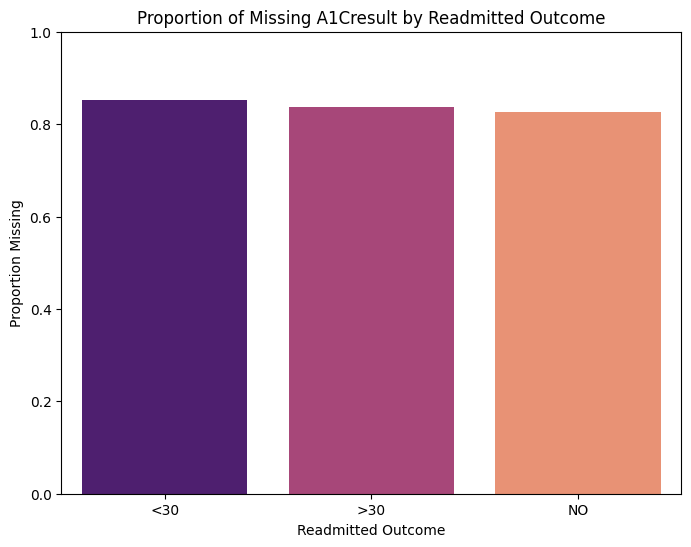

In [10]:
df['A1C_missing'] = df['A1Cresult'].isna()

# Calculate the proportion of missing values for each readmitted outcome group
prop_missing = df.groupby('readmitted')['A1C_missing'].mean().reset_index()
df.drop(columns=['A1C_missing'], inplace=True)

# Plot a bar chart for the proportion of missing A1Cresult by readmitted outcome
plt.figure(figsize=(8, 6))
sns.barplot(data=prop_missing, x='readmitted', y='A1C_missing', palette='magma')
plt.title('Proportion of Missing A1Cresult by Readmitted Outcome')
plt.xlabel('Readmitted Outcome')
plt.ylabel('Proportion Missing')
plt.ylim(0, 1)
plt.show()

As you can see looking at the graph patients who have been readmitted less than 30 days do have a relationship with the missingness in the A1Cresult which refers to the Test done to measure Hemoglbin in the blood

<ipython-input-11-a7a3442fd1cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_missing_glu, x='readmitted', y='max_glu_missing', palette='viridis')


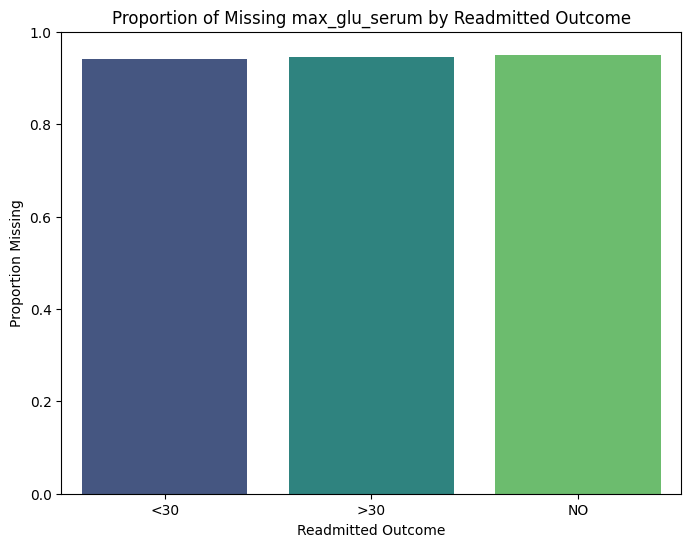

In [11]:
df['max_glu_missing'] = df['max_glu_serum'].isna()

# Calculate the proportion of missing values for each readmitted outcome group
prop_missing_glu = df.groupby('readmitted')['max_glu_missing'].mean().reset_index()
df.drop(columns=['max_glu_missing'], inplace=True)

# Plot a bar chart for the proportion of missing max_glu_serum by readmitted outcome
plt.figure(figsize=(8, 6))
sns.barplot(data=prop_missing_glu, x='readmitted', y='max_glu_missing', palette='viridis')
plt.title('Proportion of Missing max_glu_serum by Readmitted Outcome')
plt.xlabel('Readmitted Outcome')
plt.ylabel('Proportion Missing')
plt.ylim(0, 1)
plt.show()


After a simple analysis we can see that the outcome doesn't change at all when seeing if the propotin of missing value in max glu serum so we will drop that column

In [12]:
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


here we are essenitally mapping all patinets who were readmitted within 30 days of their discharge with 1( readmitted)
not readmitted or readmitted afer 30 days with 0

In [13]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [14]:
df.drop(columns=['max_glu_serum'], inplace=True)

In [15]:
df['medical_specialty_grouped'] = df['medical_specialty'].apply(categorize_specialty)
df.drop(columns=['medical_specialty'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   encounter_id               101766 non-null  int64 
 1   patient_nbr                101766 non-null  int64 
 2   race                       99493 non-null   object
 3   gender                     101766 non-null  object
 4   age                        101766 non-null  object
 5   weight                     3197 non-null    object
 6   admission_type_id          101766 non-null  int64 
 7   discharge_disposition_id   101766 non-null  int64 
 8   admission_source_id        101766 non-null  int64 
 9   time_in_hospital           101766 non-null  int64 
 10  payer_code                 61510 non-null   object
 11  num_lab_procedures         101766 non-null  int64 
 12  num_procedures             101766 non-null  int64 
 13  num_medications            101766 non-null  

Here we wil be removing bias from mout data since the original study or paper aimed to predict if a patient has a readmission or not. We will be measuring this at the patient level.

Having one patients data

In [17]:
encounter_counts = df.groupby('patient_nbr').size()

# Count how many patients had a specific number of encounters
distribution = encounter_counts.value_counts()
print(distribution)


1     54745
2     10434
3      3328
4      1421
5       717
6       346
7       207
8       111
9        70
10       42
11       20
12       19
13       14
15        9
18        6
20        6
14        5
16        4
23        3
17        3
19        3
22        2
28        1
40        1
21        1
Name: count, dtype: int64


In [18]:
# Calculate the number of encounters per patient and add it as a new column
df['encounter_count'] = df.groupby('patient_nbr')['patient_nbr'].transform('count')

# Filter for patients with exactly one, two, or more than two encounters
df_1_encounter = df[df['encounter_count'] == 1]
df_2_encounter = df[df['encounter_count'] == 2]
df_more_than_twice = df[df['encounter_count'] > 2]

print('Patients who only went to the hospital once:')
print(df_1_encounter[['patient_nbr', 'readmitted']].head(10).T)
print('\nPatients who went to the hospital twice:')
print(df_1_encounter[['patient_nbr', 'readmitted']].head(10).T)
print('\nPatients who went to the hospital more than twice:')
print(df_1_encounter[['patient_nbr', 'readmitted']].head(10).T)

Patients who only went to the hospital once:
                   0         1         2         3         4         5  \
patient_nbr  8222157  55629189  86047875  82442376  42519267  82637451   
readmitted         0         0         0         0         0         0   

                    6          7         8         9  
patient_nbr  84259809  114882984  48330783  63555939  
readmitted          0          0         0         0  

Patients who went to the hospital twice:
                   0         1         2         3         4         5  \
patient_nbr  8222157  55629189  86047875  82442376  42519267  82637451   
readmitted         0         0         0         0         0         0   

                    6          7         8         9  
patient_nbr  84259809  114882984  48330783  63555939  
readmitted          0          0         0         0  

Patients who went to the hospital more than twice:
                   0         1         2         3         4         5  \
patient_nbr

In [19]:
df.sort_values(by='encounter_id', inplace=True)

In [20]:
df_1_encounter['readmitted'].value_counts()

,count
readmitted,
0,52579
1,2166


In [21]:
df_2_encounter['readmitted'].value_counts()

,count
readmitted,
0,17748
1,3120


Here we are essenitally dropping all duplicate patients so that way the model isnot skewed or biased to predicting patients who have been to the hospital more than once.

We can see that this data has 71k patients but had +100K encounters

In [22]:
df['patient_nbr'].nunique()

71518

In [23]:
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')
df = df.reset_index(drop=True)
df = df.drop(columns=['encounter_id'])
print(df['patient_nbr'].nunique())

71518


In [24]:
df['patient_nbr'].nunique()

71518

In [25]:
df.drop(columns=['patient_nbr'], inplace =True)

In [26]:
df.drop(columns=['weight', 'payer_code','encounter_count'], inplace = True)

Instead of dropping race here which I was about to do I kept to perserve as much H1AC data as I can since the study that collected the data was testing if this is a high predictor of patient readmission

In [27]:
df['race'].fillna('Unkown', inplace = True)

<ipython-input-27-15345e82658c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Unkown', inplace = True)


In [28]:
df['A1Cresult'].fillna('No_test_performed', inplace = True)

<ipython-input-28-144879fc10f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A1Cresult'].fillna('No_test_performed', inplace = True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       71518 non-null  object
 1   gender                     71518 non-null  object
 2   age                        71518 non-null  object
 3   admission_type_id          71518 non-null  int64 
 4   discharge_disposition_id   71518 non-null  int64 
 5   admission_source_id        71518 non-null  int64 
 6   time_in_hospital           71518 non-null  int64 
 7   num_lab_procedures         71518 non-null  int64 
 8   num_procedures             71518 non-null  int64 
 9   num_medications            71518 non-null  int64 
 10  number_outpatient          71518 non-null  int64 
 11  number_emergency           71518 non-null  int64 
 12  number_inpatient           71518 non-null  int64 
 13  diag_1                     71507 non-null  object
 14  diag_2

In [30]:
df['diag_1_grouped'] = df['diag_1'].apply(map_icd9)
df['diag_2_grouped'] = df['diag_2'].apply(map_icd9)
df['diag_3_grouped'] = df['diag_3'].apply(map_icd9)
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       71518 non-null  object
 1   gender                     71518 non-null  object
 2   age                        71518 non-null  object
 3   admission_type_id          71518 non-null  int64 
 4   discharge_disposition_id   71518 non-null  int64 
 5   admission_source_id        71518 non-null  int64 
 6   time_in_hospital           71518 non-null  int64 
 7   num_lab_procedures         71518 non-null  int64 
 8   num_procedures             71518 non-null  int64 
 9   num_medications            71518 non-null  int64 
 10  number_outpatient          71518 non-null  int64 
 11  number_emergency           71518 non-null  int64 
 12  number_inpatient           71518 non-null  int64 
 13  number_diagnoses           71518 non-null  int64 
 14  A1Cres

## 4.3 Outliers

first we will transform the target into binary to make for an easier problem
we just need to rpedict if the patient was readmitted or not in this case

In [32]:
age_mapping = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
               '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
df['age'] = df['age'].map(age_mapping)
df['age'].value_counts()

,count
age,
75,18210
65,15960
55,12466
85,11589
45,6878
35,2699
95,1900
25,1127
15,535


In [33]:
continuous_cols = [
         'age','time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'number_outpatient', 'number_emergency',
        'number_inpatient', 'number_diagnoses'
    ]
    #age should be added after it's transformed into numeric




## 4.4 Feature Distributions

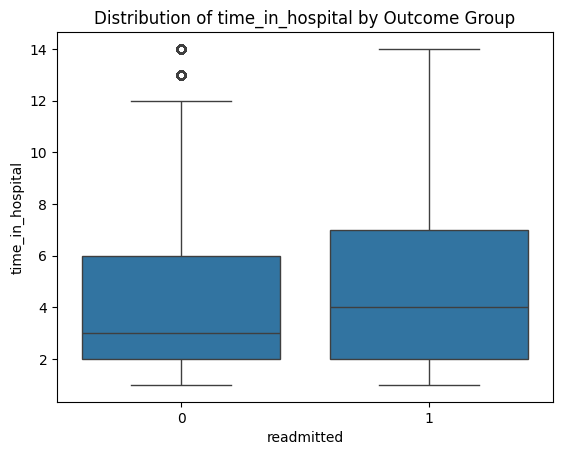

In [34]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Distribution of time_in_hospital by Outcome Group')
plt.show()

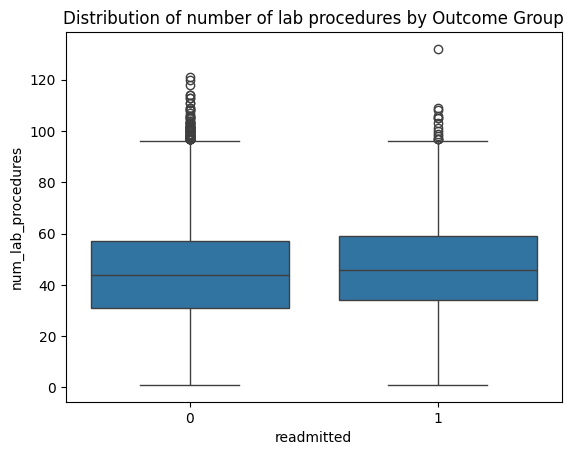

In [35]:
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df)
plt.title('Distribution of number of lab procedures by Outcome Group')
plt.show()

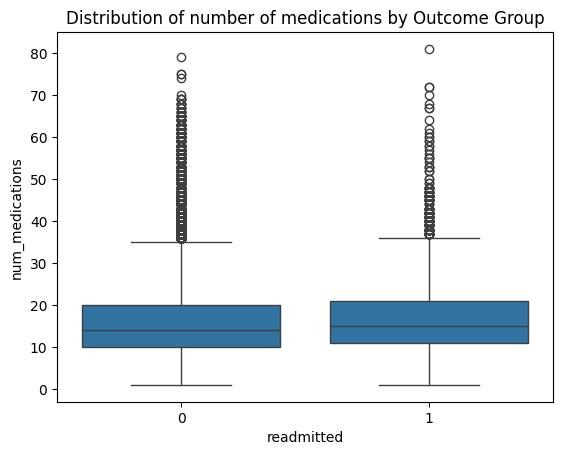

In [36]:
sns.boxplot(x='readmitted', y='num_medications', data=df)
plt.title('Distribution of number of medications by Outcome Group')
plt.show()

In [37]:
for column in continuous_cols:
    num_outliers = count_outliers(df, column)
    print(f"Number of outliers in {column}: {num_outliers}")
    print(f"Percentage of outliers in {column}: {num_outliers / len(df) * 100:.2f}%")
    print()

Number of outliers in age: 689
Percentage of outliers in age: 0.96%

Number of outliers in time_in_hospital: 1464
Percentage of outliers in time_in_hospital: 2.05%

Number of outliers in num_lab_procedures: 114
Percentage of outliers in num_lab_procedures: 0.16%

Number of outliers in num_procedures: 3956
Percentage of outliers in num_procedures: 5.53%

Number of outliers in num_medications: 1925
Percentage of outliers in num_medications: 2.69%

Number of outliers in number_outpatient: 9306
Percentage of outliers in number_outpatient: 13.01%

Number of outliers in number_emergency: 5204
Percentage of outliers in number_emergency: 7.28%

Number of outliers in number_inpatient: 8441
Percentage of outliers in number_inpatient: 11.80%

Number of outliers in number_diagnoses: 236
Percentage of outliers in number_diagnoses: 0.33%



we might have to create a submodel for the 13% of the data points that address the number of outpatients
and the 11 % of the number of inpatients

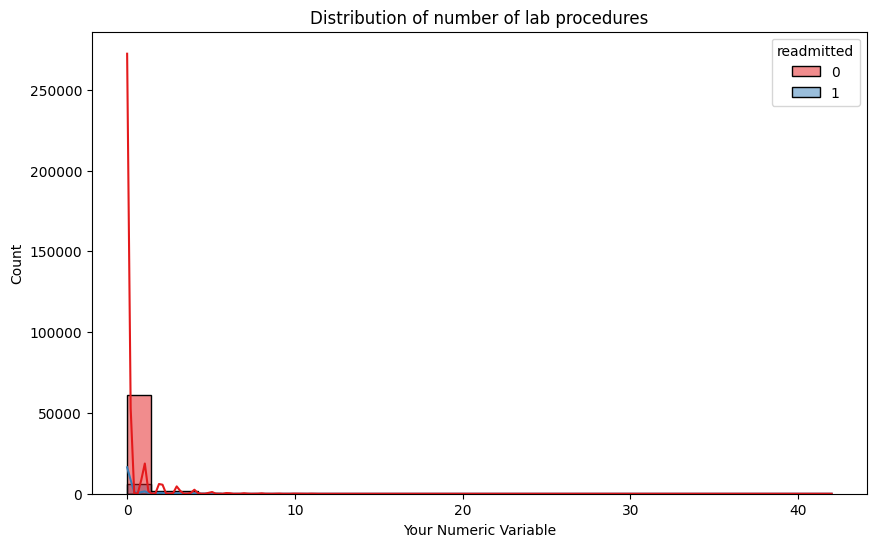

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='number_outpatient', hue='readmitted',
             kde=True, palette="Set1", edgecolor='black', bins=30)
plt.title("Distribution of number of lab procedures")
plt.xlabel("Your Numeric Variable")
plt.ylabel("Count")
plt.show()


In [39]:
print(df['number_outpatient'].value_counts().head())
print(df['number_inpatient'].value_counts().head())


number_outpatient
0    62212
1     4867
2     2025
3     1116
4      585
Name: count, dtype: int64
number_inpatient
0    63077
1     5962
2     1547
3      489
4      236
Name: count, dtype: int64


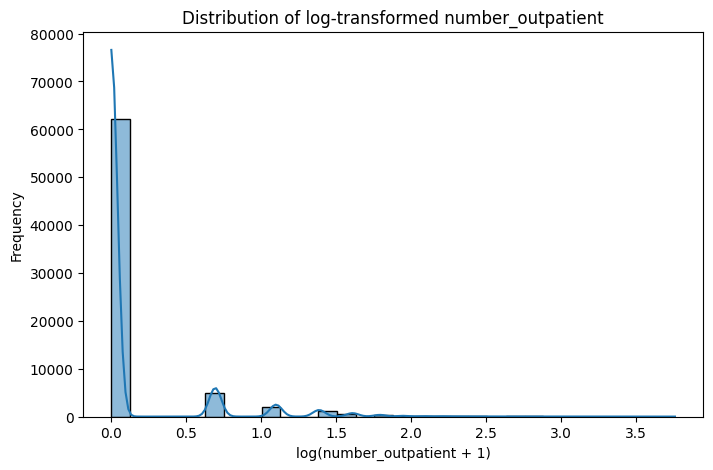

Number of outliers in log_number_outpatient: 2414
Percentage of outliers in log_number_outpatient: 3.38%


In [40]:
from scipy.stats import zscore
df['log_number_outpatient'] = np.log1p(df['number_outpatient'])

# Visualize the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['log_number_outpatient'], bins=30, kde=True)
plt.title('Distribution of log-transformed number_outpatient')
plt.xlabel('log(number_outpatient + 1)')
plt.ylabel('Frequency')
plt.show()

# Calculate z-scores for the log-transformed column
df['zscore_log_outpatient'] = zscore(df['log_number_outpatient'])

# Define outliers as values with a z-score greater than 3 or less than -3
outlier_condition = df['zscore_log_outpatient'].abs() > 3
num_outliers = outlier_condition.sum()

print(f"Number of outliers in log_number_outpatient: {num_outliers}")
print(f"Percentage of outliers in log_number_outpatient: {num_outliers / len(df) * 100:.2f}%")

# Optionally, create a cleaned DataFrame without these outliers
df_clean = df[~outlier_condition].copy()

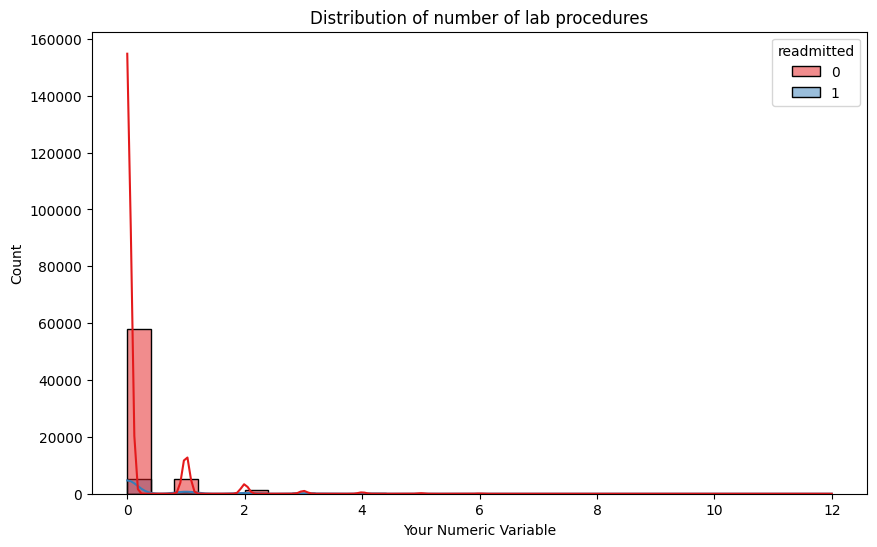

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='number_inpatient', hue='readmitted',
             kde=True, palette="Set1", edgecolor='black', bins=30)
plt.title("Distribution of number of lab procedures")
plt.xlabel("Your Numeric Variable")
plt.ylabel("Count")
plt.show()


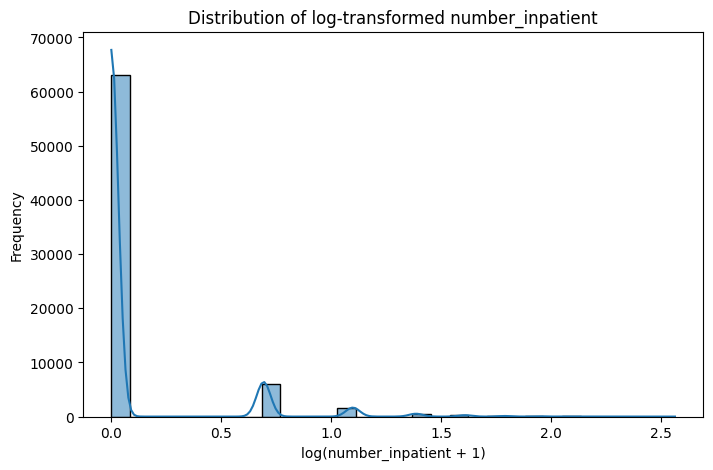

Number of outliers in log_number_inpatient: 2479
Percentage of outliers in log_number_inpatient: 3.47%


In [42]:
df['log_number_inpatient'] = np.log1p(df['number_inpatient'])

# Visualize the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['log_number_inpatient'], bins=30, kde=True)
plt.title('Distribution of log-transformed number_inpatient')
plt.xlabel('log(number_inpatient + 1)')
plt.ylabel('Frequency')
plt.show()

# Calculate z-scores for the log-transformed column
df['zscore_log_inpatient'] = zscore(df['log_number_inpatient'])

# Define outliers as values with a z-score greater than 3 or less than -3
outlier_condition = df['zscore_log_inpatient'].abs() > 3
num_outliers = outlier_condition.sum()

print(f"Number of outliers in log_number_inpatient: {num_outliers}")
print(f"Percentage of outliers in log_number_inpatient: {num_outliers / len(df) * 100:.2f}%")

# Optionally, create a cleaned DataFrame without these outliers
df_clean = df[~outlier_condition].copy()

Data still doesn't look normalied we will be not using this method

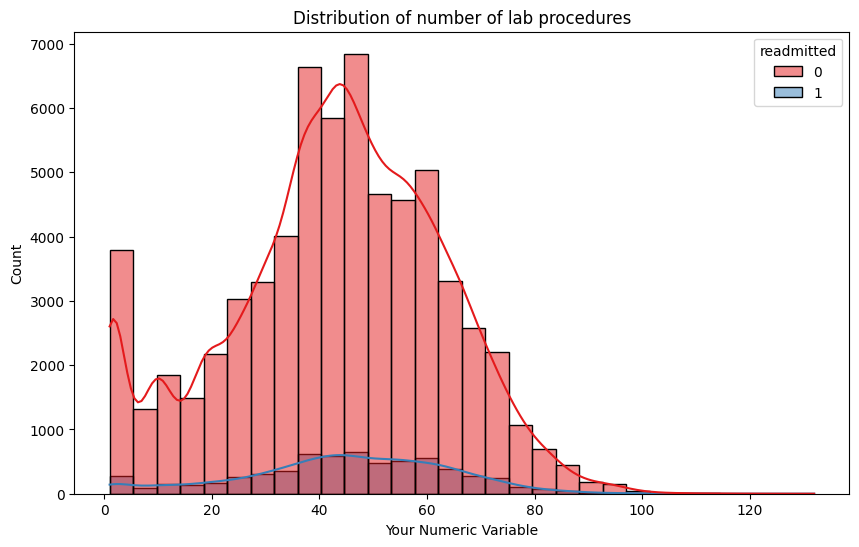

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_lab_procedures', hue='readmitted',
             kde=True, palette="Set1", edgecolor='black', bins=30)
plt.title("Distribution of number of lab procedures")
plt.xlabel("Your Numeric Variable")
plt.ylabel("Count")
plt.show()

<ipython-input-44-5dcfd79123e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='readmitted', y='num_lab_procedures', palette="Pastel1")


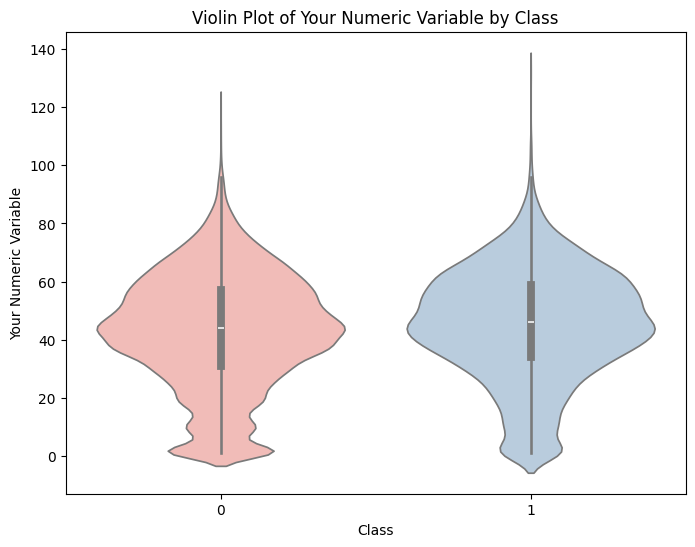

In [44]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='readmitted', y='num_lab_procedures', palette="Pastel1")
plt.title("Violin Plot of Your Numeric Variable by Class")
plt.xlabel("Class")
plt.ylabel("Your Numeric Variable")
plt.show()

I am thinking of further ivestigating the out liers here since they might have predictve power we're limited on data with only 10% of patients being readmitted

we can see tht the high

In [45]:
df['readmitted'].value_counts()

,count
readmitted,
0,65225
1,6293


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   race                       71518 non-null  object 
 1   gender                     71518 non-null  object 
 2   age                        71518 non-null  int64  
 3   admission_type_id          71518 non-null  int64  
 4   discharge_disposition_id   71518 non-null  int64  
 5   admission_source_id        71518 non-null  int64  
 6   time_in_hospital           71518 non-null  int64  
 7   num_lab_procedures         71518 non-null  int64  
 8   num_procedures             71518 non-null  int64  
 9   num_medications            71518 non-null  int64  
 10  number_outpatient          71518 non-null  int64  
 11  number_emergency           71518 non-null  int64  
 12  number_inpatient           71518 non-null  int64  
 13  number_diagnoses           71518 non-null  int

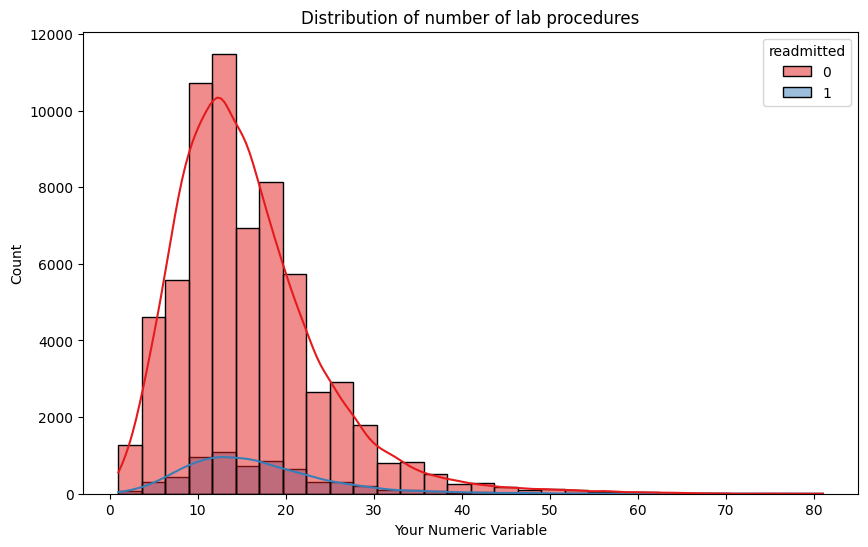

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_medications', hue='readmitted',
             kde=True, palette="Set1", edgecolor='black', bins=30)
plt.title("Distribution of number of lab procedures")
plt.xlabel("Your Numeric Variable")
plt.ylabel("Count")
plt.show()

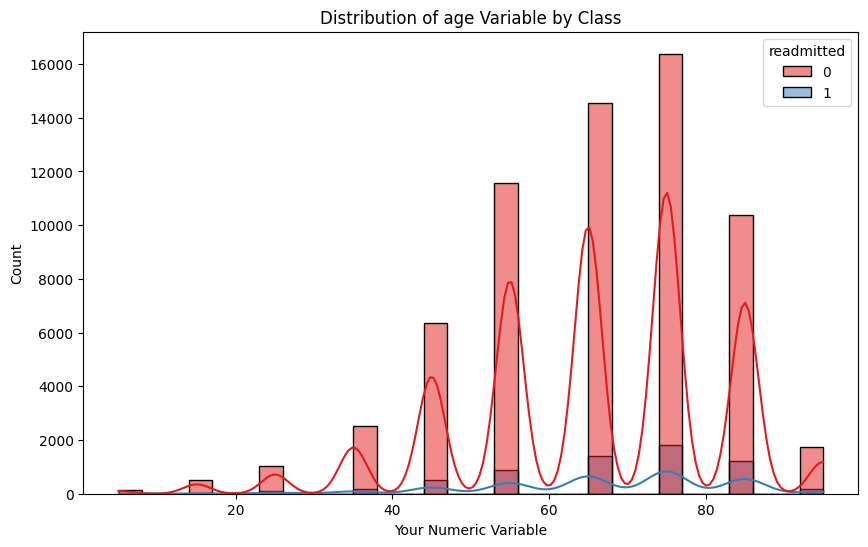

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='readmitted',
             kde=True, palette="Set1", edgecolor='black', bins=30)
plt.title("Distribution of age Variable by Class")
plt.xlabel("Your Numeric Variable")
plt.ylabel("Count")
plt.show()



<ipython-input-49-b4cc03304c03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmitted', y='number_diagnoses', palette="Set2")


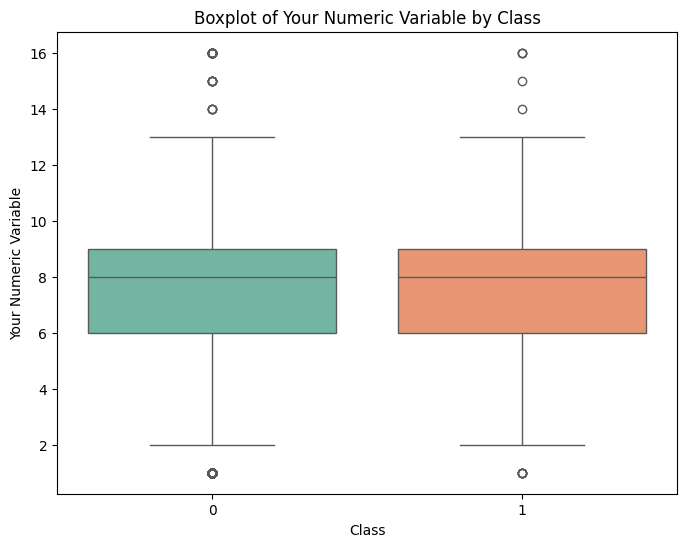

In [49]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='readmitted', y='number_diagnoses', palette="Set2")
plt.title("Boxplot of Your Numeric Variable by Class")
plt.xlabel("Class")
plt.ylabel("Your Numeric Variable")
plt.show()


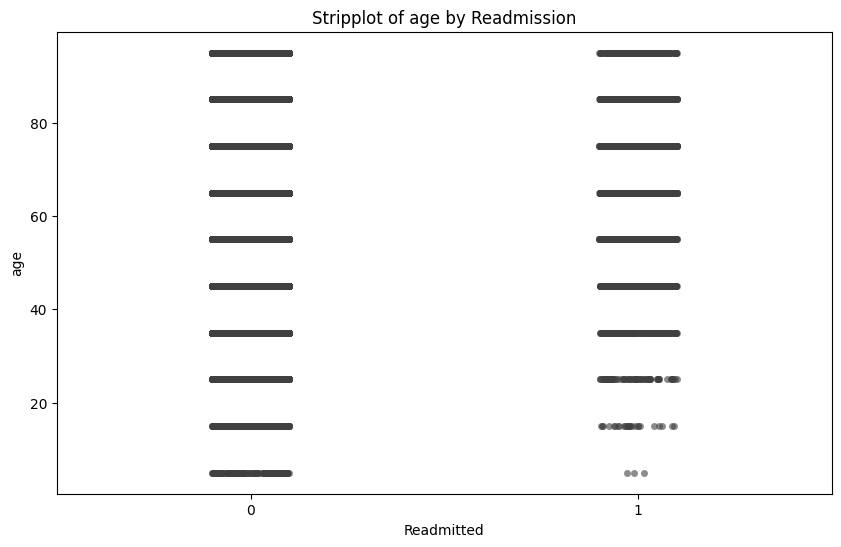

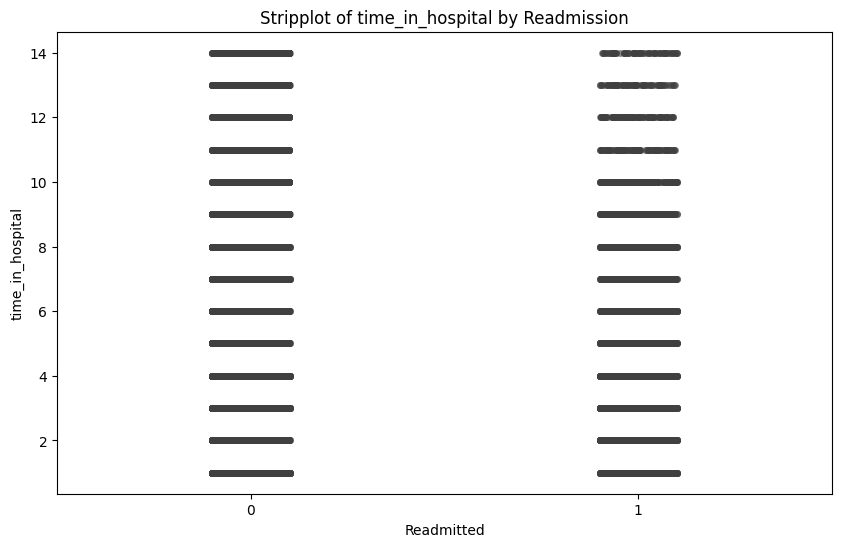

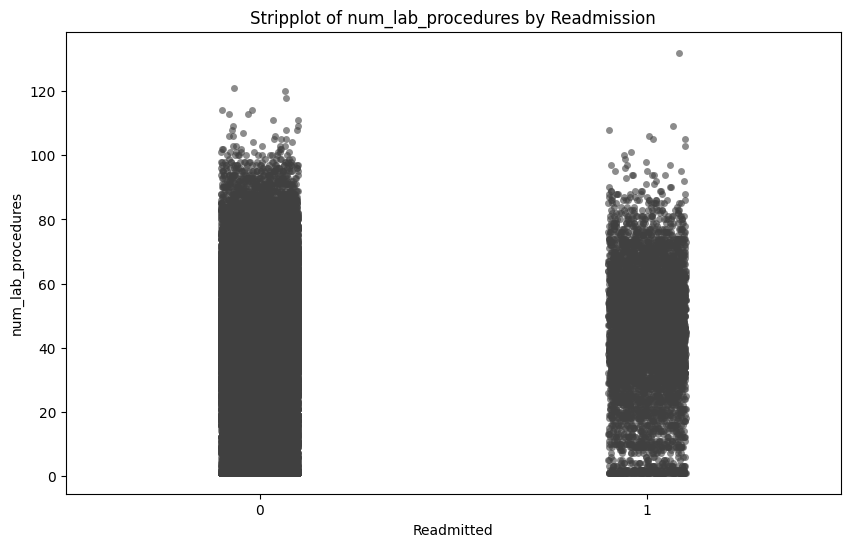

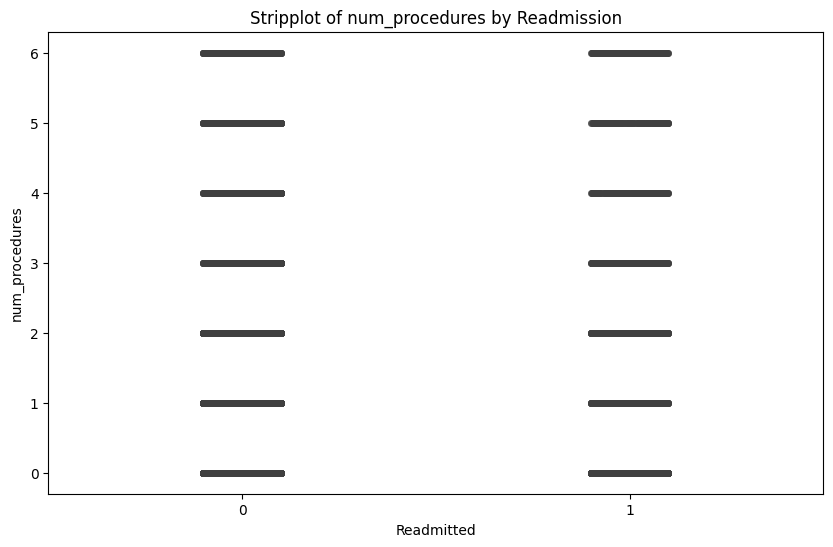

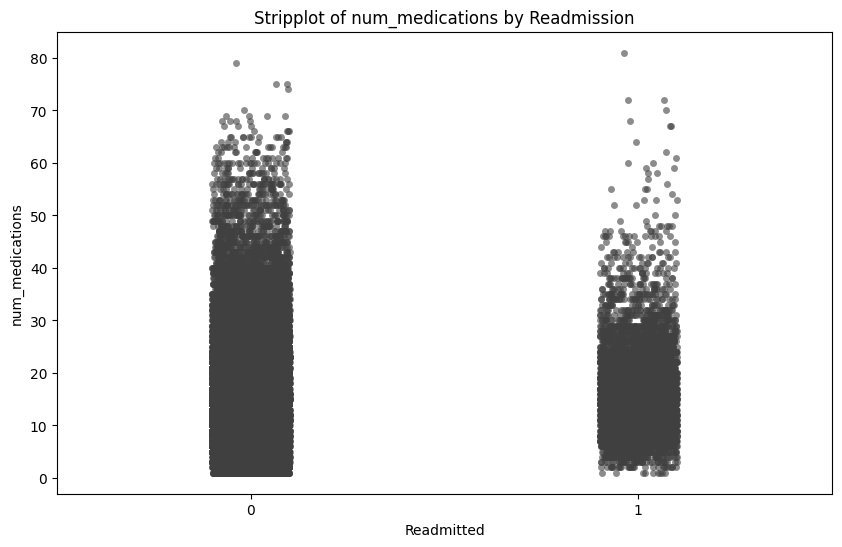

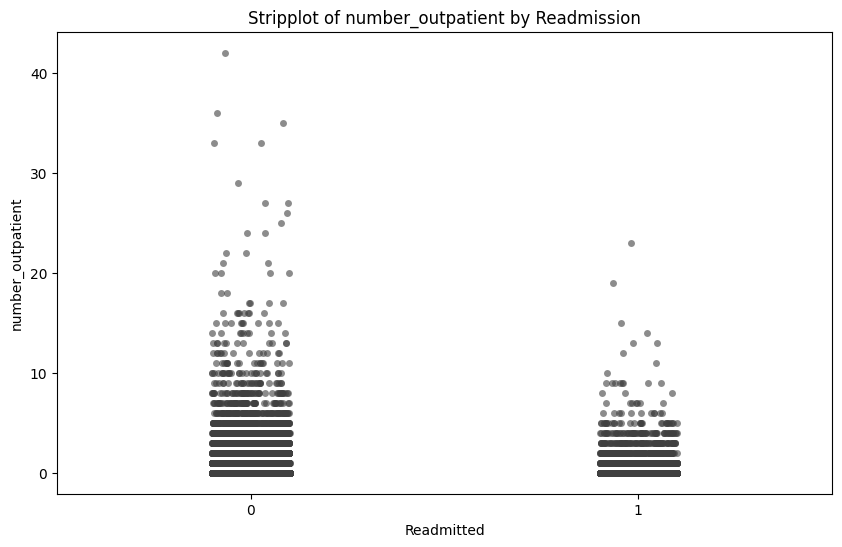

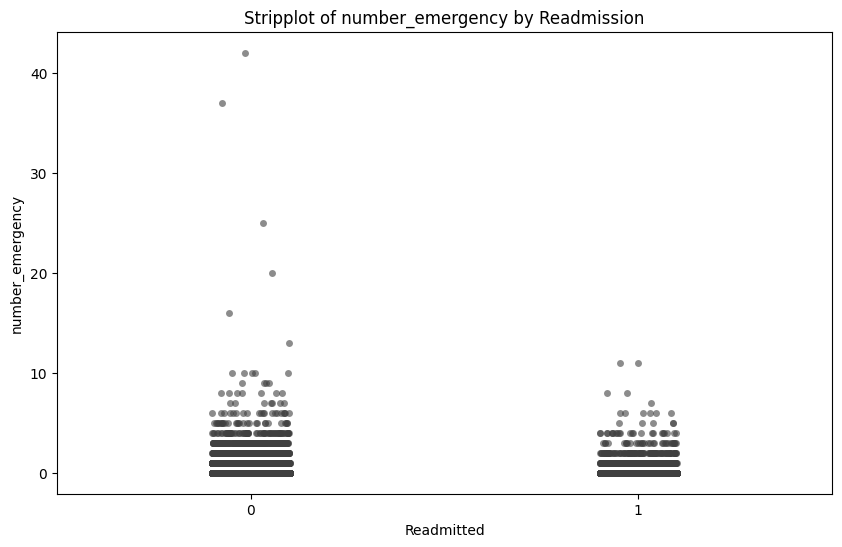

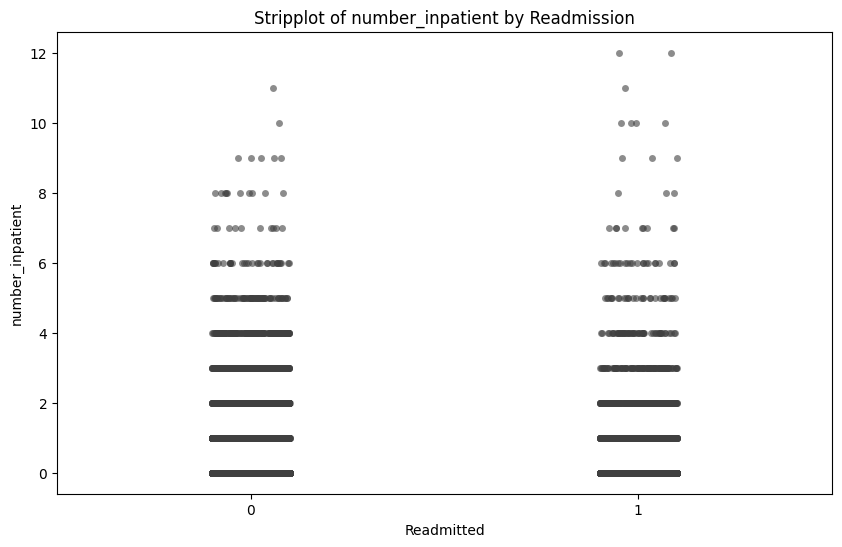

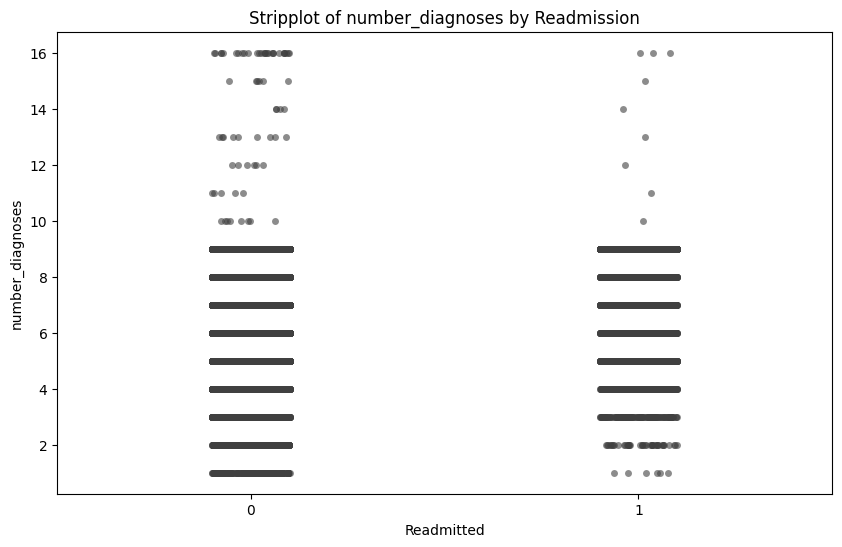

In [50]:
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='readmitted', y=col, data=df, jitter=True, color=".25", alpha=0.6)
    plt.title(f"Stripplot of {col} by Readmission")
    plt.xlabel("Readmitted")
    plt.ylabel(col)
    plt.show()

<ipython-input-51-6798a0a5ff9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='A1Cresult', palette="Set2")


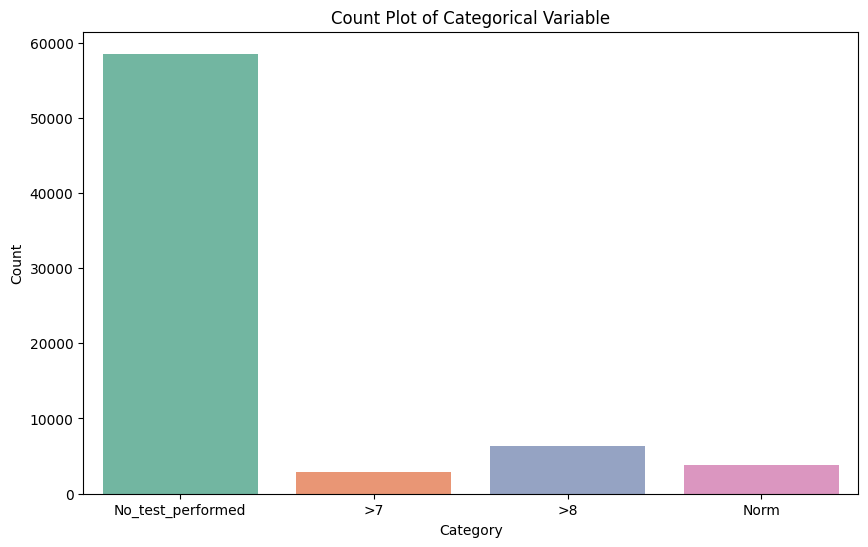

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='A1Cresult', palette="Set2")
plt.title("Count Plot of Categorical Variable")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

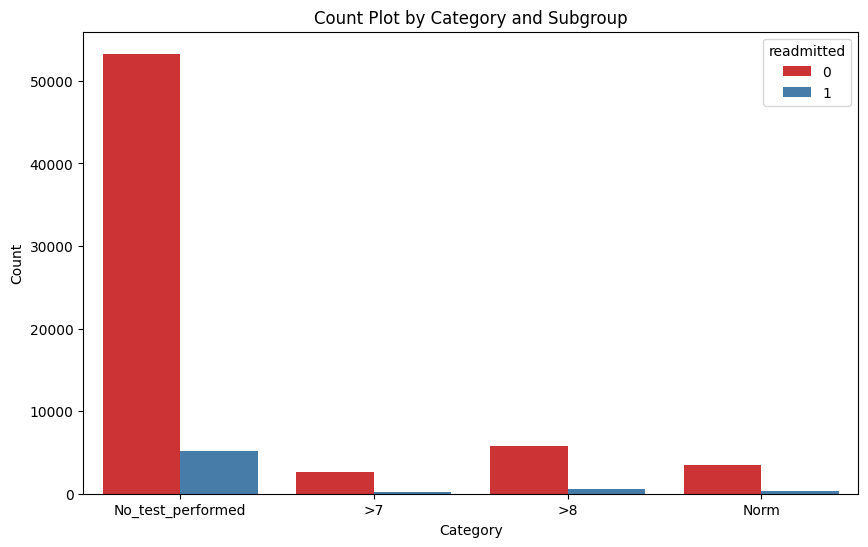

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='A1Cresult', hue='readmitted', palette="Set1")
plt.title("Count Plot by Category and Subgroup")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


<ipython-input-53-40d0abd8f682>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diag_1_grouped', palette="Set2")


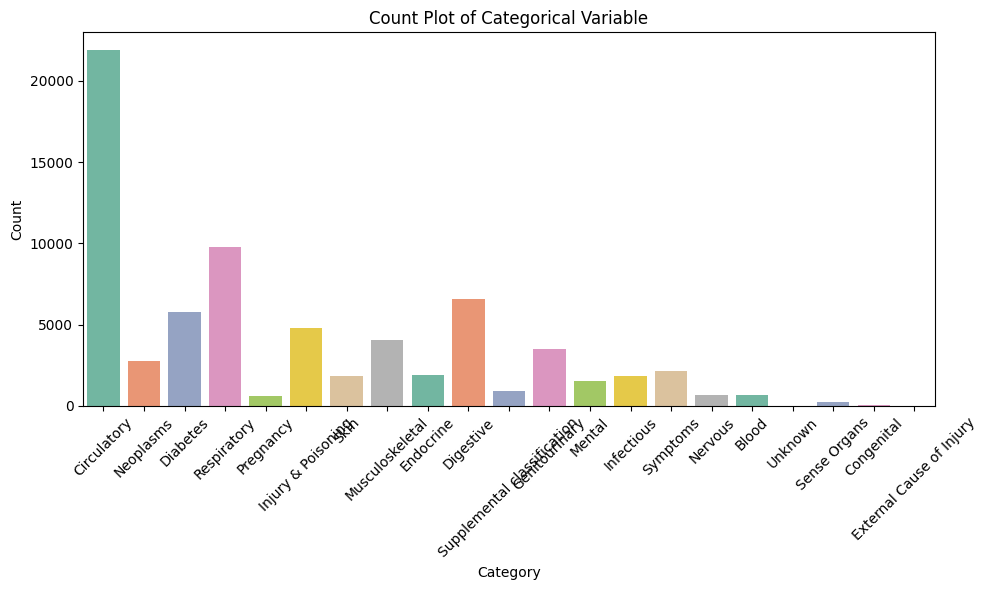

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diag_1_grouped', palette="Set2")
plt.title("Count Plot of Categorical Variable")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

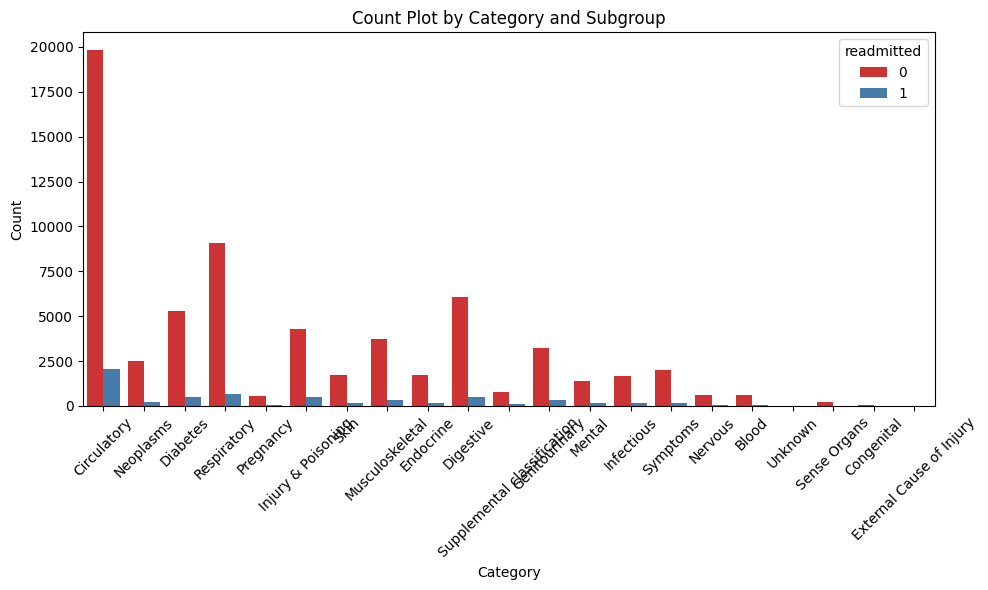

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diag_1_grouped', hue='readmitted', palette="Set1")
plt.title("Count Plot by Category and Subgroup")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Count")
plt.show()


After looking at the distribution of the diagnoses vs the class label we can see that circulatory diseases have the highest percent of being readmitted

we need to take into account it has the highest counts of all catgories

so we will measure which is category has the highest significance



we will be grouping all catgories with less than 5% into other for all3 types of diagnoses

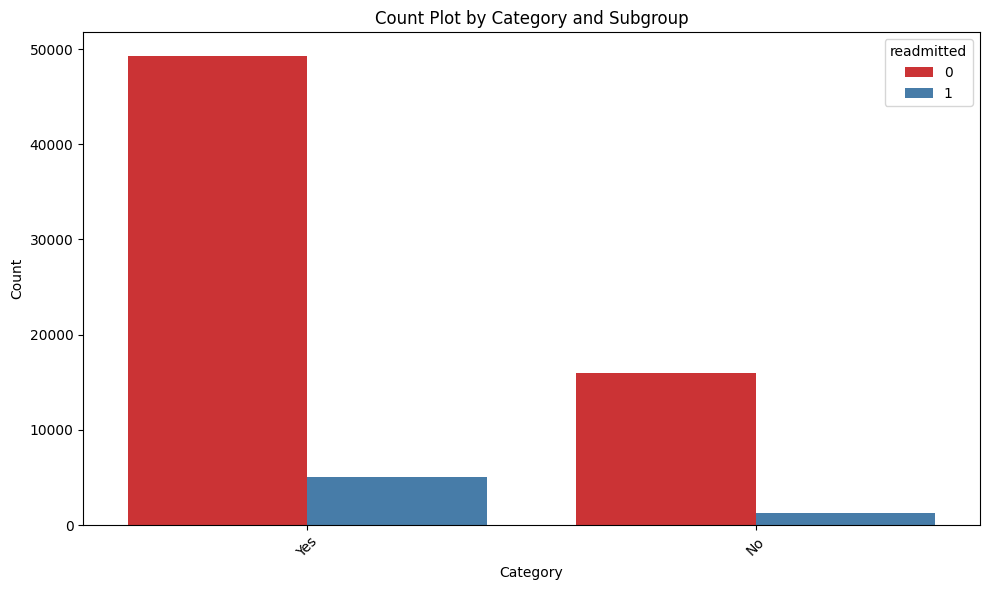

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diabetesMed', hue='readmitted', palette="Set1")
plt.title("Count Plot by Category and Subgroup")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Count")
plt.show()


                 diag_1_grouped  readmitted  percentage
40                      Unknown           1   18.181818
36  Supplemental classification           1   13.376483
20                       Mental           1   10.658915
18           Injury & Poisoning           1   10.587989
1                         Blood           1    9.741248
3                   Circulatory           1    9.486617
7                      Diabetes           1    9.043928
26                      Nervous           1    8.980213
16                   Infectious           1    8.965897
11                    Endocrine           1    8.882979
14                Genitourinary           1    8.850313
24                    Neoplasms           1    8.424508
22              Musculoskeletal           1    8.357843
9                     Digestive           1    7.945205
34                         Skin           1    7.883369
38                     Symptoms           1    7.542804
30                  Respiratory           1    7

<ipython-input-56-7ee604c74c63>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_percent, x='diag_1_grouped', y='percentage', palette="Set1")


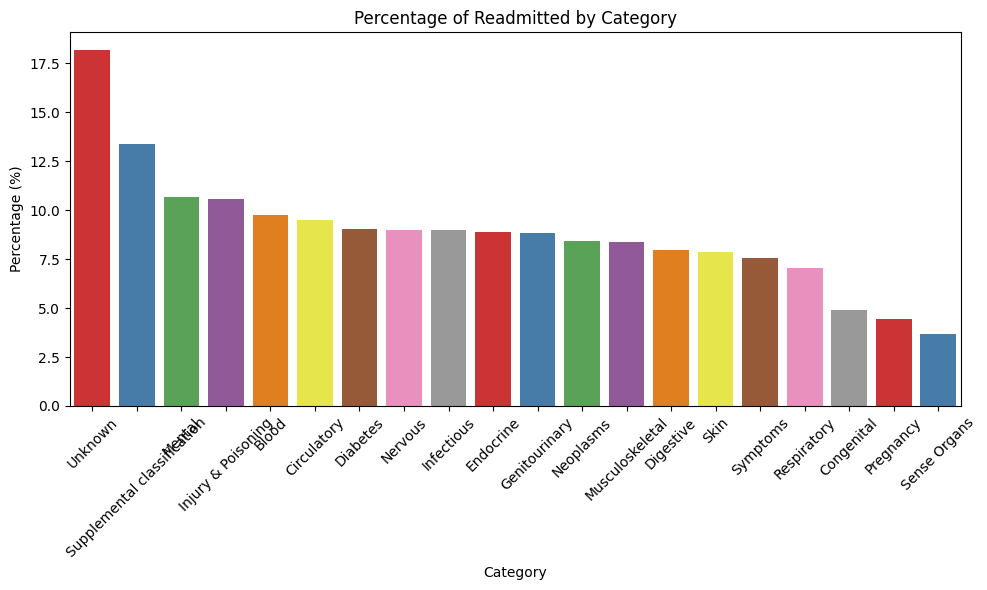

In [56]:
percent_df = (df.groupby('diag_1_grouped')['readmitted']
                .value_counts(normalize=True)
                .mul(100)
                .rename("percentage")
                .reset_index())

# For example, if you want the percentage for the "readmitted" class:
# (Change 'readmitted' below if your target class has a different name)
target_class = 1
target_percent = percent_df[percent_df['readmitted'] == target_class]

# Sort to see which category has the highest percentage
target_percent = target_percent.sort_values(by='percentage', ascending=False)
print(target_percent)

# Optionally, plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=target_percent, x='diag_1_grouped', y='percentage', palette="Set1")
plt.title("Percentage of Readmitted by Category")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

  diabetesMed  readmitted  percentage
3         Yes           1    9.260112
1          No           1    7.343450


<ipython-input-57-6d3603f0fef0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_percent, x='diabetesMed', y='percentage', palette="Set1")


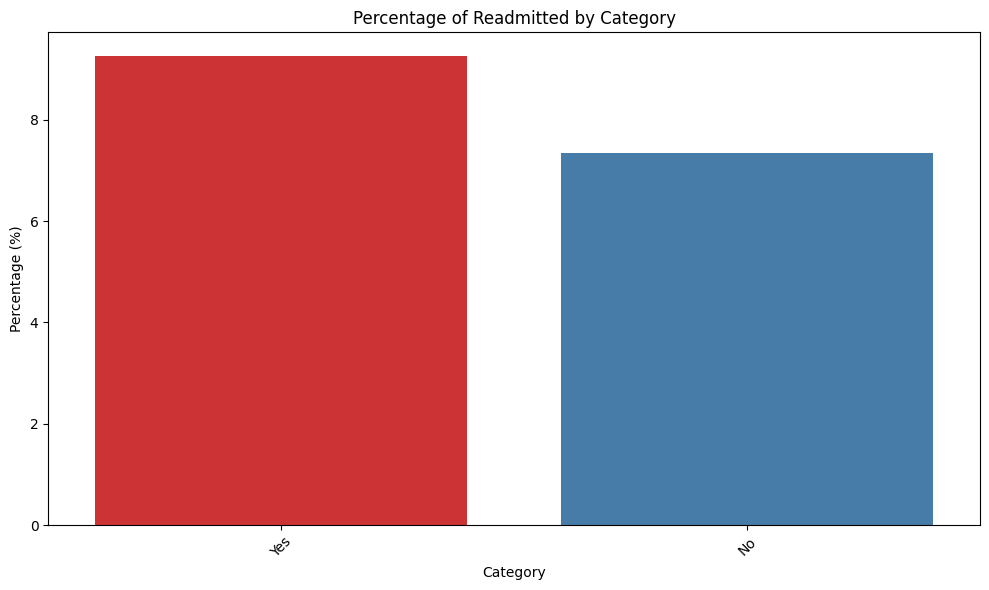

In [57]:
percent_df = (df.groupby('diabetesMed')['readmitted']
                .value_counts(normalize=True)
                .mul(100)
                .rename("percentage")
                .reset_index())

# For example, if you want the percentage for the "readmitted" class:
# (Change 'readmitted' below if your target class has a different name)
target_class = 1
target_percent = percent_df[percent_df['readmitted'] == target_class]

# Sort to see which category has the highest percentage
target_percent = target_percent.sort_values(by='percentage', ascending=False)
print(target_percent)

# Optionally, plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=target_percent, x='diabetesMed', y='percentage', palette="Set1")
plt.title("Percentage of Readmitted by Category")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

Since we're using an ensemble model we will ignore the outliers for no if our results require us to further clean the data we will clean it further

In [58]:
df.drop(columns=['log_number_outpatient', 'zscore_log_outpatient', 'log_number_inpatient', 'zscore_log_inpatient'], inplace=True)

# Feature Engineering

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       71518 non-null  object
 1   gender                     71518 non-null  object
 2   age                        71518 non-null  int64 
 3   admission_type_id          71518 non-null  int64 
 4   discharge_disposition_id   71518 non-null  int64 
 5   admission_source_id        71518 non-null  int64 
 6   time_in_hospital           71518 non-null  int64 
 7   num_lab_procedures         71518 non-null  int64 
 8   num_procedures             71518 non-null  int64 
 9   num_medications            71518 non-null  int64 
 10  number_outpatient          71518 non-null  int64 
 11  number_emergency           71518 non-null  int64 
 12  number_inpatient           71518 non-null  int64 
 13  number_diagnoses           71518 non-null  int64 
 14  A1Cres

## 5.1 Catgorical Variables

we will start with grouping all values under 5% count or distribution in diagnoses column into a new catgory called other to simplify our model and data

you can refer to the visulizaitons above to know the reason why

In [60]:
df['diag_1_grouped'].value_counts()/len(df)*100



,count
diag_1_grouped,
Circulatory,30.613272
Respiratory,13.669286
Digestive,9.186499
Diabetes,8.116838
Injury & Poisoning,6.682234
Musculoskeletal,5.704858
Genitourinary,4.913448
Neoplasms,3.834000
Symptoms,3.021617


In [61]:
# Calculate the percentage of each category
value_perc = df['diag_1_grouped'].value_counts(normalize=True) * 100
value_perc2 = df['diag_2_grouped'].value_counts(normalize=True) * 100
value_perc3 = df['diag_3_grouped'].value_counts(normalize=True) * 100

# Identify categories that constitute less than 5% of the data
categories_to_replace = value_perc[value_perc < 5].index
categories_to_replace2 = value_perc2[value_perc2 < 5].index
categories_to_replace3 = value_perc3[value_perc3 < 5].index

# Replace those categories with 'other'
df['diag_1_grouped'] = df['diag_1_grouped'].apply(lambda x: 'other' if x in categories_to_replace else x)
df['diag_2_grouped'] = df['diag_2_grouped'].apply(lambda x: 'other' if x in categories_to_replace2 else x)
df['diag_3_grouped'] = df['diag_3_grouped'].apply(lambda x: 'other' if x in categories_to_replace3 else x)

# Optional: view the new distribution
print(df['diag_1_grouped'].value_counts(normalize=True) * 100)
print(df['diag_2_grouped'].value_counts(normalize=True) * 100)
print(df['diag_3_grouped'].value_counts(normalize=True) * 100)



diag_1_grouped
Circulatory           30.613272
other                 26.027014
Respiratory           13.669286
Digestive              9.186499
Diabetes               8.116838
Injury & Poisoning     6.682234
Musculoskeletal        5.704858
Name: proportion, dtype: float64
diag_2_grouped
Circulatory      31.508152
other            29.072401
Diabetes         13.645516
Respiratory      10.126122
Endocrine         8.002181
Genitourinary     7.645628
Name: proportion, dtype: float64
diag_3_grouped
other            30.616069
Circulatory      29.800889
Diabetes         17.701837
Endocrine         9.196286
Respiratory       6.813669
Genitourinary     5.871249
Name: proportion, dtype: float64


In [62]:
# columns to “group”
cols = ['race', 'discharge_disposition_id', 'admission_source_id']

for col in cols:
    # 1) compute percent share of each category
    pct = df[col].value_counts(normalize=True) * 100

    # 2) find the categories that are < 5%
    to_replace = pct[pct < 5].index

    # 3) make a new grouped column (or overwrite if you prefer)
    df[f'{col}_grouped'] = df[col].apply(lambda x: 'other' if x in to_replace else x)

    # (optional) inspect the new distribution
    print(f"\n{col} grouped distribution (%):")
    print(df[f'{col}_grouped'].value_counts(normalize=True) * 100)



race grouped distribution (%):
race_grouped
Caucasian          74.793758
AfricanAmerican    18.019240
other               7.187002
Name: proportion, dtype: float64

discharge_disposition_id grouped distribution (%):
discharge_disposition_id_grouped
1        61.966218
other    14.161470
3        12.282223
6        11.590089
Name: proportion, dtype: float64

admission_source_id grouped distribution (%):
admission_source_id_grouped
7        53.538969
1        30.771274
other     8.769820
17        6.919936
Name: proportion, dtype: float64


In [63]:
# 1) define your mappings
disp_map = {
    1:  "Discharged to home",
    2:  "Discharged/transferred to another short term hospital",
    3:  "Discharged/transferred to SNF",
    4:  "Discharged/transferred to ICF",
    5:  "Discharged/transferred to another type of inpatient care institution",
    6:  "Discharged/transferred to home with home health service",
    7:  "Left AMA",
    8:  "Discharged/transferred to home under care of Home IV provider",
    9:  "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab fac including rehab units of a hospital .",
    23: "Discharged/transferred to a long term care hospital.",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility.",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH).",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

adm_map = {
    1:  "Physician Referral",
    2:  "Clinic Referral",
    3:  "HMO Referral",
    4:  "Transfer from a hospital",
    5:  "Transfer from a Skilled Nursing Facility (SNF)",
    6:  "Transfer from another health care facility",
    7:  "Emergency Room",
    8:  "Court/Law Enforcement",
    9:  "Not Available",
    10: "Transfer from critial access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}

# 2) map your grouped columns to descriptions
df['discharge_disposition_desc'] = (
    df['discharge_disposition_id_grouped']
      .map(disp_map)
      .fillna('other')   # catch the 'other' bucket (and any unmapped)
)

df['admission_source_desc'] = (
    df['admission_source_id_grouped']
      .map(adm_map)
      .fillna('other')
)

# 3) (optional) check
print(df[['discharge_disposition_id_grouped', 'discharge_disposition_desc']]
        .drop_duplicates()
      )
print(df[['admission_source_id_grouped', 'admission_source_desc']]
        .drop_duplicates()
      )


   discharge_disposition_id_grouped  \
0                                 1   
1                                 3   
7                                 6   
27                            other   

                           discharge_disposition_desc  
0                                  Discharged to home  
1                       Discharged/transferred to SNF  
7   Discharged/transferred to home with home healt...  
27                                              other  
    admission_source_id_grouped admission_source_desc
0                         other                 other
2                             7        Emergency Room
21                            1    Physician Referral
977                          17                  NULL


In [64]:
from sklearn.preprocessing import LabelEncoder

# 1) Discharge disposition
disp_le = LabelEncoder()
# fit on the descriptions
disp_le.fit(df['discharge_disposition_desc'])
# transform into a new encoded column
df['discharge_disposition_enc'] = disp_le.transform(df['discharge_disposition_desc'])
# build a mapping from description → code
discharge_map = dict(zip(disp_le.classes_, disp_le.transform(disp_le.classes_)))

# 2) Admission source
adm_le = LabelEncoder()
adm_le.fit(df['admission_source_desc'])
df['admission_source_enc'] = adm_le.transform(df['admission_source_desc'])
admission_map = dict(zip(adm_le.classes_, adm_le.transform(adm_le.classes_)))

# 3) (optional) inspect your maps
print("Discharge disposition encoding map:")
for desc, code in discharge_map.items():
    print(f"  {desc:50s} → {code}")

print("\nAdmission source encoding map:")
for desc, code in admission_map.items():
    print(f"  {desc:50s} → {code}")


Discharge disposition encoding map:
  Discharged to home                                 → 0
  Discharged/transferred to SNF                      → 1
  Discharged/transferred to home with home health service → 2
  other                                              → 3

Admission source encoding map:
  Emergency Room                                     → 0
  NULL                                               → 1
  Physician Referral                                 → 2
  other                                              → 3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   race                              71518 non-null  object
 1   gender                            71518 non-null  object
 2   age                               71518 non-null  int64 
 3   admission_type_id                 71518 non-null  int64 
 4   discharge_disposition_id          71518 non-null  int64 
 5   admission_source_id               71518 non-null  int64 
 6   time_in_hospital                  71518 non-null  int64 
 7   num_lab_procedures                71518 non-null  int64 
 8   num_procedures                    71518 non-null  int64 
 9   num_medications                   71518 non-null  int64 
 10  number_outpatient                 71518 non-null  int64 
 11  number_emergency                  71518 non-null  int64 
 12  number_inpatient  

In [66]:
# Cell 1 — Drop duplicate discharge/admission columns
cols_to_drop = [
    'discharge_disposition_id',
    'discharge_disposition_id_grouped',
    'discharge_disposition_desc',
    'admission_source_id',
    'admission_source_id_grouped',
    'admission_source_desc'
]
df_clean = df.copy().drop(columns=cols_to_drop)
print("After dropping:", df_clean.shape)


After dropping: (71518, 46)


In [67]:
# Cell 2 — Label‑encode all remaining object columns
from sklearn.preprocessing import LabelEncoder

obj_cols = df_clean.select_dtypes(include='object').columns.tolist()
encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    # save mapping for reference
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# modeling‑ready DataFrame
final_df = df_clean.copy()
print("Final shape:", final_df.shape)
final_df.info()


Final shape: (71518, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   race                       71518 non-null  int64
 1   gender                     71518 non-null  int64
 2   age                        71518 non-null  int64
 3   admission_type_id          71518 non-null  int64
 4   time_in_hospital           71518 non-null  int64
 5   num_lab_procedures         71518 non-null  int64
 6   num_procedures             71518 non-null  int64
 7   num_medications            71518 non-null  int64
 8   number_outpatient          71518 non-null  int64
 9   number_emergency           71518 non-null  int64
 10  number_inpatient           71518 non-null  int64
 11  number_diagnoses           71518 non-null  int64
 12  A1Cresult                  71518 non-null  int64
 13  metformin                  71518 non-null  int64
 1

## 5.2 Feature Scaling

## 5.3 New Features

# Splitting The Data

In [86]:
df['readmitted'].value_counts()/len(df)*100

,count
readmitted,
0,91.200817
1,8.799183


Stratified train/test split (no upsampling)

In [87]:
# Cell 1 — Stratified train/test split without upsampling
# Ensure the modeling‑ready DataFrame is present
assert 'final_df' in globals(), "Please define `final_df` before running this cell."

# Features and target
X = final_df.drop('readmitted', axis=1)
y = final_df['readmitted']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

# Display class distributions
print("Train class distribution (no upsampling):")
print((y_train.value_counts(normalize=True) * 100).round(2))
print("\nTest class distribution:")
print((y_test.value_counts(normalize=True) * 100).round(2))


Train class distribution (no upsampling):
readmitted
0    91.2
1     8.8
Name: proportion, dtype: float64

Test class distribution:
readmitted
0    91.2
1     8.8
Name: proportion, dtype: float64


In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Only apply SMOTE to the training split
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

print("Train distribution (after upsampling):")
print((y_train_up.value_counts(normalize=True) * 100).round(2))

Train distribution (after upsampling):
readmitted
1    50.0
0    50.0
Name: proportion, dtype: float64


# Modeling

In [89]:

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd

# 1) Define your candidate models
models = {
    "RandomForest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "ExtraTrees":   ExtraTreesClassifier(n_jobs=-1, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost":        AdaBoostClassifier(random_state=42),
    "XGBoost":         XGBClassifier(random_state=42)
}

# 2) Prepare a results table
results = []

# 3) Loop through each model and each training variant
for name, clf in models.items():
    for variant, (X_tr, y_tr) in [
        ("NoUpsample", (X_train,   y_train)),
        ("SMOTEUpsample", (X_train_up, y_train_up))
    ]:
        # Train
        clf.fit(X_tr, y_tr)
        # Predict on the same held‑out test set
        y_pred = clf.predict(X_test)

        # Evaluate
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        acc      = accuracy_score(y_test, y_pred)
        AUC = roc_auc_score(y_test, y_pred)
        # Record
        results.append({
            "Model": name,
            "Variant": variant,
            "MacroF1": macro_f1,
            "Accuracy": acc,
            "AUC": AUC

        })

# 4) Convert to DataFrame and pivot for comparison
df_results = pd.DataFrame(results)
comparison = df_results.pivot(index="Model", columns="Variant", values="MacroF1")
print("Macro‑F1 Comparison:\n", comparison)

# (Optional) you can also look at accuracy:
# acc_comp = df_results.pivot(index="Model", columns="Variant", values="Accuracy")
# print("\nAccuracy Comparison:\n", acc_comp)


Macro‑F1 Comparison:
 Variant           NoUpsample  SMOTEUpsample
Model                                      
AdaBoost            0.476989       0.496195
ExtraTrees          0.477937       0.501223
GradientBoosting    0.480198       0.504504
RandomForest        0.476989       0.495954
XGBoost             0.482868       0.503560


### TEMPORARY CELL TO SEE IF ACCURACY IMPROVES

In [100]:
# Cell — Add relational & risk‑flag features (corrected)

# 1) Per‑day rates
final_df['labs_per_day']   = final_df['num_lab_procedures']   / final_df['time_in_hospital']
final_df['meds_per_day']   = final_df['num_medications']      / final_df['time_in_hospital']
final_df['procs_per_day']  = final_df['num_procedures']        / final_df['time_in_hospital']

# 2) Medication‑change ratio
final_df['change_frac']    = final_df['change']               / (final_df['num_medications'] + 1)

# 3) Utilization interaction ratios
final_df['inp_out_ratio']  = final_df['number_inpatient']     / (final_df['number_outpatient'] + 1)
final_df['er_out_ratio']   = final_df['number_emergency']     / (final_df['number_outpatient'] + 1)

# 4) Diagnosis diversity
final_df['diag_count']     = final_df[['diag_1_grouped','diag_2_grouped','diag_3_grouped']].nunique(axis=1)

# 5) Polypharmacy flag
final_df['polypharmacy']   = (final_df['num_medications'] > 10).astype(int)

# 6) A1C numeric mapping & drug‑class count
a1c_map = {'None':0, 'normal':1, '>7':2, '>8':3}
final_df['A1C_num']        = final_df['A1Cresult'].map(a1c_map)

med_cols = [
    'metformin','repaglinide','nateglinide','chlorpropamide',
    'glimepiride','acetohexamide','glipizide','glyburide',
    'tolbutamide','pioglitazone','rosiglitazone','acarbose',
    'miglitol','troglitazone','tolazamide','examide',
    'citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone',
    'metformin-rosiglitazone','metformin-pioglitazone'
]
final_df['drug_class_count'] = final_df[med_cols].apply(lambda row: (row!='No').sum(), axis=1)

# 7) Elderly flag & explicit interactions
final_df['elderly']        = (final_df['age'] > 65).astype(int)
final_df['age_x_labs']     = final_df['age'] * final_df['num_lab_procedures']
final_df['meds_x_change']  = final_df['num_medications'] * final_df['change_frac']


In [103]:
final_df.drop(columns=['A1C_num'], inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   race                       71518 non-null  int64  
 1   gender                     71518 non-null  int64  
 2   age                        71518 non-null  int64  
 3   admission_type_id          71518 non-null  int64  
 4   time_in_hospital           71518 non-null  int64  
 5   num_lab_procedures         71518 non-null  int64  
 6   num_procedures             71518 non-null  int64  
 7   num_medications            71518 non-null  int64  
 8   number_outpatient          71518 non-null  int64  
 9   number_emergency           71518 non-null  int64  
 10  number_inpatient           71518 non-null  int64  
 11  number_diagnoses           71518 non-null  int64  
 12  A1Cresult                  71518 non-null  int64  
 13  metformin                  71518 non-null  int

In [104]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1) Define features/target
X = final_df.drop('readmitted', axis=1)
y = final_df['readmitted']

# 2) Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

# 3) Upsample minority class on the training set only
sm = SMOTE(random_state=42)
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

print(f"Train upsampled: {X_train_up.shape}, class counts: {y_train_up.value_counts().to_dict()}")
print(f"Test untouched:   {X_test.shape}, class counts: {y_test.value_counts().to_dict()}")

Train upsampled: (110882, 57), class counts: {1: 55441, 0: 55441}
Test untouched:   (10728, 57), class counts: {0: 9784, 1: 944}


In [105]:

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# 1) Base estimator
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
)

# 2) RFECV: recursively eliminate least‑important feature, optimizing macro‑F1
rfecv = RFECV(
    estimator=xgb,
    step=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    min_features_to_select=5,
    n_jobs=-1
)

# 3) Fit on the SMOTE‑upsampled train set
rfecv.fit(X_train_up, y_train_up)

# 4) Extract selected feature names
selected_features = X_train_up.columns[rfecv.support_].tolist()
print(f"Optimal feature count: {len(selected_features)}")
print("Selected features:", selected_features)

Optimal feature count: 41
Selected features: ['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'medical_specialty_grouped', 'diag_1_grouped', 'diag_2_grouped', 'diag_3_grouped', 'race_grouped', 'discharge_disposition_enc', 'admission_source_enc', 'labs_per_day', 'meds_per_day', 'procs_per_day', 'change_frac', 'inp_out_ratio', 'er_out_ratio', 'diag_count', 'polypharmacy', 'age_x_labs', 'meds_x_change']


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1) Build pipeline: select only RFECV features → XGBoost
final_pipe = Pipeline([
    ('selector', ColumnTransformer(
        [('keep', 'passthrough', selected_features)],
        remainder='drop'
    )),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# 2) Train on the upsampled training split
final_pipe.fit(X_train_up, y_train_up)

# 3) Predict & report on the original hold‑out test set
y_pred = final_pipe.predict(X_test[selected_features])
print("Hold‑out Test Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Hold‑out Test Classification Report:

              precision    recall  f1-score   support

           0     0.9126    0.9914    0.9504      9784
           1     0.1515    0.0159    0.0288       944

    accuracy                         0.9056     10728
   macro avg     0.5321    0.5037    0.4896     10728
weighted avg     0.8456    0.9056    0.8693     10728



### ORIGINAL WORK

In [90]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1) Define features/target
X = final_df.drop('readmitted', axis=1)
y = final_df['readmitted']

# 2) Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

# 3) Upsample minority class on the training set only
sm = SMOTE(random_state=42)
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

print(f"Train upsampled: {X_train_up.shape}, class counts: {y_train_up.value_counts().to_dict()}")
print(f"Test untouched:   {X_test.shape}, class counts: {y_test.value_counts().to_dict()}")


Train upsampled: (110882, 45), class counts: {1: 55441, 0: 55441}
Test untouched:   (10728, 45), class counts: {0: 9784, 1: 944}


here we will be now using REFCV which is a feature selction technizue that will chose the optimal number of features that maximize performance

we also used assigned weights in the XGB classifer function to imporve the predicions of the miniority class


In [91]:
# Cell 2 — RFECV with XGBoost to select the best feature subset

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# 1) Base estimator
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
)

# 2) RFECV: recursively eliminate least‑important feature, optimizing macro‑F1
rfecv = RFECV(
    estimator=xgb,
    step=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    min_features_to_select=5,
    n_jobs=-1
)

# 3) Fit on the SMOTE‑upsampled train set
rfecv.fit(X_train_up, y_train_up)

# 4) Extract selected feature names
selected_features = X_train_up.columns[rfecv.support_].tolist()
print(f"Optimal feature count: {len(selected_features)}")
print("Selected features:", selected_features)


Optimal feature count: 35
Selected features: ['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'medical_specialty_grouped', 'diag_1_grouped', 'diag_2_grouped', 'diag_3_grouped', 'race_grouped', 'discharge_disposition_enc', 'admission_source_enc']


In [92]:
# Cell 3 — Final pipeline & evaluation on the untouched test set

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1) Build pipeline: select only RFECV features → XGBoost
final_pipe = Pipeline([
    ('selector', ColumnTransformer(
        [('keep', 'passthrough', selected_features)],
        remainder='drop'
    )),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# 2) Train on the upsampled training split
final_pipe.fit(X_train_up, y_train_up)

# 3) Predict & report on the original hold‑out test set
y_pred = final_pipe.predict(X_test[selected_features])
print("Hold‑out Test Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Hold‑out Test Classification Report:

              precision    recall  f1-score   support

           0     0.9132    0.9161    0.9146      9784
           1     0.1008    0.0975    0.0991       944

    accuracy                         0.8441     10728
   macro avg     0.5070    0.5068    0.5069     10728
weighted avg     0.8417    0.8441    0.8429     10728



finds the SMOTE‑ENN + XGB hyperparameters that give the best ranking performance (AUC) under 5‑fold CV.


In [96]:
# Cell 1 — Stratified split & hyperparameter search for ROC AUC

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

# 1) Train/Test split
X = final_df.drop('readmitted', axis=1)
y = final_df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

# 1) Slice down to only the chosen features
X_train_sel = X_train[selected_features]
X_test_sel  = X_test[selected_features]

# 2) Build SMOTE‑ENN + XGB pipeline
pipe = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('clf',      XGBClassifier(
                    use_label_encoder=False,
                    eval_metric='logloss',
                    random_state=42,
                    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
                ))
])

# 3) Hyperparameter grid
param_dist = {
    'clf__n_estimators':   [100, 200, 500],
    'clf__max_depth':      [4, 6, 8],
    'clf__learning_rate':  [0.01, 0.05, 0.1],
    'clf__subsample':      [0.6, 0.8, 1.0],
    'clf__colsample_bytree':[0.6, 0.8, 1.0]
}

# 4) RandomizedSearchCV for ROC AUC
rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rs.fit(X_train_sel, y_train)

best_model = rs.best_estimator_
print("Best params for AUC:", rs.best_params_)
print("CV ROC AUC:", round(rs.best_score_, 4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for AUC: {'clf__subsample': 0.8, 'clf__n_estimators': 500, 'clf__max_depth': 6, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 1.0}
CV ROC AUC: 0.5526


 tunes a decision threshold on a withheld slice of your training data (so you don’t over‑fit to the test set), using Youden’s J to balance sensitivity/specificity.

In [97]:
# Cell 2 — Threshold tuning (Youden’s J) & final test evaluation

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# 1) Carve out a small val fold from TRAIN to tune threshold
X_tr2, X_val, y_tr2, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# 2) Retrain best_model on X_tr2
best_model.fit(X_tr2, y_tr2)

# 3) Get val probabilities
probs_val = best_model.predict_proba(X_val)[:,1]

# 4) Compute ROC curve and pick threshold where (TPR – FPR) is max
fpr, tpr, thresh = roc_curve(y_val, probs_val)
youden_idx = np.argmax(tpr - fpr)
best_thresh = thresh[youden_idx]
print(f"Optimal threshold (Youden’s J) = {best_thresh:.3f}")

# 5) Evaluate on TEST
probs_test = best_model.predict_proba(X_test)[:,1]
print("Test ROC AUC:", round(roc_auc_score(y_test, probs_test),4))

# 6) Classification at tuned threshold
y_test_pred = (probs_test >= best_thresh).astype(int)
print(f"\nClassification report @ thresh={best_thresh:.3f}:\n")
print(classification_report(y_test, y_test_pred, digits=4))


Optimal threshold (Youden’s J) = 0.597
Test ROC AUC: 0.5658

Classification report @ thresh=0.597:

              precision    recall  f1-score   support

           0     0.9289    0.5251    0.6710      9784
           1     0.1060    0.5837    0.1794       944

    accuracy                         0.5303     10728
   macro avg     0.5175    0.5544    0.4252     10728
weighted avg     0.8565    0.5303    0.6277     10728



swaps pure SMOTE for SMOTE‑ENN, which up‑ and then cleans noisy borderline examples before fitting XGB.

shows how to plug in a simple focal‑loss objective into XGBoost—encouraging the model to focus on the rare “1” class.

# Evaluation Metrics

# Conclusion & Next Steps

# Scratch Pad / Appendix

## Catboost Permutation importnace trial

We will be essenitally measuring the feature importance of each feature by removing the feature form the model then measuring the accruacy the accuracy lost is the importance of that feature

to further enhance this approach I will be trying to remove related columns and alsoa dding a random feature any of my features that has less importnace than the random feature will be removed

In [ ]:
df_cat = df.copy()

In [ ]:
df_cat.info()
df_cat.to_csv('df_cat.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       71518 non-null  object
 1   gender                     71518 non-null  object
 2   age                        71518 non-null  int64 
 3   admission_type_id          71518 non-null  int64 
 4   discharge_disposition_id   71518 non-null  int64 
 5   admission_source_id        71518 non-null  int64 
 6   time_in_hospital           71518 non-null  int64 
 7   num_lab_procedures         71518 non-null  int64 
 8   num_procedures             71518 non-null  int64 
 9   num_medications            71518 non-null  int64 
 10  number_outpatient          71518 non-null  int64 
 11  number_emergency           71518 non-null  int64 
 12  number_inpatient           71518 non-null  int64 
 13  number_diagnoses           71518 non-null  int64 
 14  A1Cres

In [ ]:
import pandas as pd
df_cat = pd.read_csv('df_cat.csv')

In [ ]:
!pip install numpy==1.23.5

!pip install catboost

!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 118.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ------------------------------
# 1. Load your dataset (assumed already in df_cat)
# For example:
# df_cat = pd.read_csv("your_data.csv")

# ------------------------------
# 2. Add a randomized feature
np.random.seed(42)  # For reproducibility
df_cat['random_feature'] = np.random.rand(len(df_cat))

# ------------------------------
# 3. Define your continuous columns and target
continuous_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'random_feature'
]
target = 'readmitted'  # Change if your target column is named differently

# ------------------------------
# 4. Create a list of features (all columns except the target)
features = [col for col in df_cat.columns if col != target]

# ------------------------------
# 5. Define categorical features.
# Treat every column that is not in continuous_cols and not the target as categorical.
categorical_features = [col for col in df_cat.columns if col not in continuous_cols + [target]]

# ------------------------------
# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cat[features],
                                                    df_cat[target],
                                                    test_size=0.2,
                                                    random_state=42)

# ------------------------------
# 7. Create Pool objects for CatBoost, specifying which features are categorical
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

# ------------------------------
# 8. Initialize and train the CatBoostClassifier on the GPU
model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    task_type='GPU',        # This enables GPU training
    verbose=10              # Set to 0 to suppress training output
)

model.fit(train_pool, eval_set=test_pool)

# ------------------------------
# 9. Make predictions on the test set and evaluate accuracy
predictions = model.predict(test_pool)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

# ------------------------------
# 10. Define a metric function for permutation importance.
# This function computes accuracy on a given dataset.
def accuracy_metric(model, X, y, cat_features):
    pool = Pool(data=X, label=y, cat_features=cat_features)
    preds = model.predict(pool)
    return accuracy_score(y, preds)

# ------------------------------
# 11. Implement the permutation importance function.
def permutation_importances(model, X, y, metric, cat_features):
    baseline = metric(model, X, y, cat_features)
    importances = []
    for col in X.columns:
        # Save original column values
        saved = X[col].copy()
        # Permute the column values
        X[col] = np.random.permutation(X[col])
        # Compute new metric after permutation
        new_score = metric(model, X, y, cat_features)
        # Restore original column
        X[col] = saved
        # Importance is the drop in performance
        importances.append(baseline - new_score)
    return np.array(importances)

# ------------------------------
# 12. Compute permutation importances on the test set.
# Use a copy of X_test to avoid modifying the original DataFrame.
X_test_perm = X_test.copy()
perm_importances = permutation_importances(model, X_test_perm, y_test, accuracy_metric, categorical_features)

# ------------------------------
# 13. Print the permutation importances.
print("\nPermutation Importances:")
for feature, importance in zip(X_test.columns, perm_importances):
    print(f"{feature}: {importance}")

# ------------------------------
# 14. Optionally, create a final DataFrame with the test set features and predictions for review.
X_test_with_predictions = X_test.copy()
X_test_with_predictions['prediction'] = predictions

print("\nFinal DataFrame with Predictions (Test Set):")
print(X_test_with_predictions.head())


0:	learn: 0.6035614	test: 0.6017092	best: 0.6017092 (0)	total: 139ms	remaining: 13.8s
10:	learn: 0.3232651	test: 0.3108587	best: 0.3108587 (10)	total: 1.16s	remaining: 9.43s
20:	learn: 0.2959639	test: 0.2802925	best: 0.2802925 (20)	total: 2.11s	remaining: 7.96s
30:	learn: 0.2891601	test: 0.2729861	best: 0.2729861 (30)	total: 3.04s	remaining: 6.78s
40:	learn: 0.2867998	test: 0.2710881	best: 0.2710881 (40)	total: 3.31s	remaining: 4.76s
50:	learn: 0.2856102	test: 0.2703910	best: 0.2703910 (50)	total: 3.59s	remaining: 3.45s
60:	learn: 0.2849372	test: 0.2701918	best: 0.2701918 (60)	total: 3.79s	remaining: 2.42s
70:	learn: 0.2840972	test: 0.2699175	best: 0.2699172 (69)	total: 3.99s	remaining: 1.63s
80:	learn: 0.2835587	test: 0.2698638	best: 0.2698638 (80)	total: 4.18s	remaining: 982ms
90:	learn: 0.2828767	test: 0.2695042	best: 0.2695024 (88)	total: 4.44s	remaining: 439ms
99:	learn: 0.2823084	test: 0.2694657	best: 0.2694365 (98)	total: 4.85s	remaining: 0us
bestTest = 0.2694364885
bestIteratio

In [ ]:
print("Column at index 44:", X_train.columns[44])


Column at index 45: random_feature


Sorted Permutation Importances:
                      feature  importance
13           number_diagnoses     0.00007
0                        race     0.00000
33        glyburide-metformin     0.00000
25              rosiglitazone     0.00000
26                   acarbose     0.00000
27                   miglitol     0.00000
28               troglitazone     0.00000
29                 tolazamide     0.00000
30                    examide     0.00000
31                citoglipton     0.00000
32                    insulin     0.00000
34        glipizide-metformin     0.00000
23                tolbutamide     0.00000
35   glimepiride-pioglitazone     0.00000
36    metformin-rosiglitazone     0.00000
37     metformin-pioglitazone     0.00000
38                     change     0.00000
39                diabetesMed     0.00000
40  medical_specialty_grouped     0.00000
41             diag_1_grouped     0.00000
42             diag_2_grouped     0.00000
43             diag_3_grouped     0.00000
24

<ipython-input-6-b8bfa36adb35>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=perm_importance_df, palette="viridis")


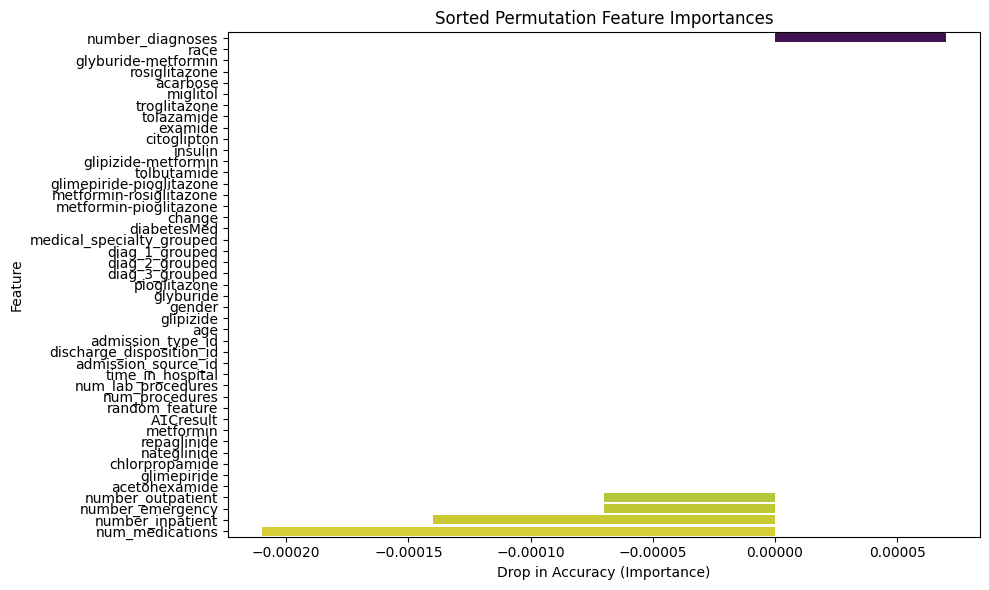

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the permutation importances
perm_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm_importances
})

# Sort the DataFrame by importance in descending order
perm_importance_df.sort_values('importance', ascending=False, inplace=True)

# Display the sorted importances
print("Sorted Permutation Importances:")
print(perm_importance_df)

# Plot the sorted permutation importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=perm_importance_df, palette="viridis")
plt.title("Sorted Permutation Feature Importances")
plt.xlabel("Drop in Accuracy (Importance)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Sorted Repeated Permutation Importances:
                      feature  avg_importance  std_importance
13           number_diagnoses        0.000014        0.000046
44             random_feature        0.000014        0.000055
22                  glyburide        0.000002        0.000013
3           admission_type_id        0.000000        0.000000
31                citoglipton        0.000000        0.000000
25              rosiglitazone        0.000000        0.000000
26                   acarbose        0.000000        0.000000
27                   miglitol        0.000000        0.000000
28               troglitazone        0.000000        0.000000
29                 tolazamide        0.000000        0.000000
30                    examide        0.000000        0.000000
32                    insulin        0.000000        0.000000
1                      gender        0.000000        0.000000
33        glyburide-metformin        0.000000        0.000000
34        glipizide-metformin

<ipython-input-7-c3fd6898d352>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_importance', y='feature', data=importance_df, palette="viridis")


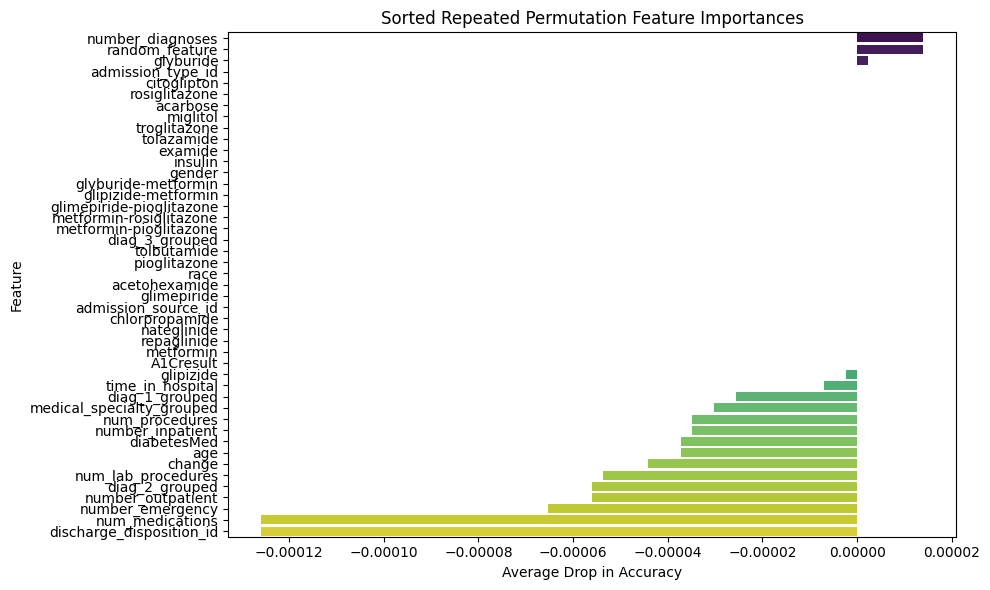

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your metric function (accuracy metric) as before.
def accuracy_metric(model, X, y, cat_features):
    pool = Pool(data=X, label=y, cat_features=cat_features)
    preds = model.predict(pool)
    return accuracy_score(y, preds)

# Repeated permutation importance function
def repeated_permutation_importances(model, X, y, metric, cat_features, n_repeats=30):
    baseline = metric(model, X, y, cat_features)
    # Dictionary to store importance values for each feature
    importances = {col: [] for col in X.columns}

    # Repeat the permutation process multiple times
    for i in range(n_repeats):
        for col in X.columns:
            saved = X[col].copy()  # save original values
            X[col] = np.random.permutation(X[col])  # permute the feature
            new_score = metric(model, X, y, cat_features)  # new metric
            X[col] = saved  # restore original values
            importances[col].append(baseline - new_score)

    # Compute average and standard deviation of importances for each feature
    avg_importance = {col: np.mean(vals) for col, vals in importances.items()}
    std_importance = {col: np.std(vals) for col, vals in importances.items()}
    return avg_importance, std_importance

# Make a copy of X_test to use for permutation (so we don't modify original X_test)
X_test_perm = X_test.copy()

# Compute repeated permutation importances
avg_importance, std_importance = repeated_permutation_importances(
    model, X_test_perm, y_test, accuracy_metric, categorical_features, n_repeats=30
)

# Create a DataFrame with the results
importance_df = pd.DataFrame({
    'feature': list(avg_importance.keys()),
    'avg_importance': list(avg_importance.values()),
    'std_importance': list(std_importance.values())
})

# Sort the DataFrame by average importance in descending order
importance_df.sort_values('avg_importance', ascending=False, inplace=True)
print("Sorted Repeated Permutation Importances:")
print(importance_df)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_importance', y='feature', data=importance_df, palette="viridis")
plt.title("Sorted Repeated Permutation Feature Importances")
plt.xlabel("Average Drop in Accuracy")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


this will be used for me to freely explore new thoughts and new trials. Expect it to be messy and not as structred as the other sections

In [ ]:
pip install -U numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 111.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ------------------------------
# 1. Assume df_cat is your original DataFrame.
# Here we select only the features of interest plus the target.
continuous_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'random_feature'
]

selected_features = [
    'A1Cresult', 'glipizide', 'time_in_hospital', 'diag_1_grouped',
    'medical_specialty_grouped', 'num_procedures', 'number_inpatient',
    'diabetesMed', 'age', 'change', 'num_lab_procedures', 'diag_2_grouped',
    'number_outpatient', 'number_emergency', 'num_medications',
    'discharge_disposition_id'
]
target = 'readmitted'

# subset df
df_selected = df_cat[selected_features + [target]].copy()

# derive cat features
categorical_features_selected = [
    col for col in selected_features
    if col not in continuous_cols
]

# Ensure that all categorical features are treated as strings.
for col in categorical_features_selected:
    df_selected[col] = df_selected[col].astype(str)

# ------------------------------
# 3. Split the data into features (X) and target (y), then into train and test sets.
X = df_selected[selected_features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create Pool objects for CatBoost that specify which features are categorical.
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_selected)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_selected)

# ------------------------------
# Approach 1: Train CatBoost without SMOTE.
model_without_smote = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    task_type='GPU',    # Remove or change if not using GPU
    verbose=10
)
model_without_smote.fit(train_pool, eval_set=test_pool)

pred_without_smote = model_without_smote.predict(test_pool)
accuracy_without_smote = accuracy_score(y_test, pred_without_smote)
print("Test Accuracy without SMOTE:", accuracy_without_smote)
print("Classification Report without SMOTE:")
print(classification_report(y_test, pred_without_smote))

0:	learn: 0.6285536	test: 0.6284927	best: 0.6284927 (0)	total: 22.2ms	remaining: 2.19s
10:	learn: 0.3581732	test: 0.3582357	best: 0.3582357 (10)	total: 167ms	remaining: 1.35s
20:	learn: 0.3040605	test: 0.3041548	best: 0.3041548 (20)	total: 384ms	remaining: 1.45s
30:	learn: 0.2910167	test: 0.2907379	best: 0.2907379 (30)	total: 807ms	remaining: 1.8s
40:	learn: 0.2860929	test: 0.2850633	best: 0.2850633 (40)	total: 1.24s	remaining: 1.78s
50:	learn: 0.2844702	test: 0.2836495	best: 0.2836495 (50)	total: 1.64s	remaining: 1.57s
60:	learn: 0.2836985	test: 0.2830722	best: 0.2830522 (59)	total: 2.12s	remaining: 1.36s
70:	learn: 0.2828319	test: 0.2825586	best: 0.2825586 (70)	total: 2.64s	remaining: 1.08s
80:	learn: 0.2822977	test: 0.2823064	best: 0.2823064 (80)	total: 3.12s	remaining: 731ms
90:	learn: 0.2819646	test: 0.2821735	best: 0.2821735 (90)	total: 3.69s	remaining: 365ms
99:	learn: 0.2815008	test: 0.2820884	best: 0.2820791 (95)	total: 3.89s	remaining: 0us
bestTest = 0.2820791291
bestIteratio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### testing SMOTE

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ------------------------------
# 0. Define your continuous vs. selected feature lists
continuous_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'random_feature'
]

selected_features = [
    'A1Cresult', 'glipizide', 'time_in_hospital', 'diag_1_grouped',
    'medical_specialty_grouped', 'num_procedures', 'number_inpatient',
    'diabetesMed', 'age', 'change', 'num_lab_procedures', 'diag_2_grouped',
    'number_outpatient', 'number_emergency', 'num_medications',
    'discharge_disposition_id'
]

target = 'readmitted'

# ------------------------------
# 1. Subset your DataFrame
#    (replace this with however you load df_cat)
# df_cat = pd.read_csv("your_full_data.csv")
df_selected = df_cat[selected_features + [target]].copy()

# ------------------------------
# 2. Derive & label‑encode categorical features
categorical_features = [c for c in selected_features if c not in continuous_cols]
for col in categorical_features:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# ------------------------------
# 3. Split into train/test (stratified)
X = df_selected[selected_features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------
# 4. Apply SMOTE on training only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ------------------------------
# 5. Reassemble into DataFrames
df_train = pd.DataFrame(X_train_res, columns=X.columns)
df_train[target] = y_train_res

df_test = X_test.copy()
df_test[target] = y_test.values  # align indices if needed

# ------------------------------
# 6. Save to CSV
df_train.to_csv("df_train_smote.csv", index=False)
df_test.to_csv("df_test.csv", index=False)

print("Saved:")
print(" • df_train_smote.csv  (SMOTE applied)")
print(" • df_test.csv         (original test split)")


Saved:
 • df_train_smote.csv  (SMOTE applied)
 • df_test.csv         (original test split)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

# ------------------------------
# 1. Load your train and test sets
df_train = pd.read_csv("df_train_smote.csv")
df_test  = pd.read_csv("df_test.csv")

# ------------------------------
# 2. Define continuous columns & target
continuous_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'random_feature'
]
target = 'readmitted'

# ------------------------------
# 3. Identify features & categorical indices
features = [c for c in df_train.columns if c != target]
cat_features = [c for c in features if c not in continuous_cols]
cat_indices = [features.index(c) for c in cat_features]

# ------------------------------
# 4. Prepare X/y
X_train, y_train = df_train[features], df_train[target]
X_test,  y_test  = df_test[features],  df_test[target]

# ------------------------------
# 5. Build an imblearn Pipeline: SMOTE → CatBoost
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', CatBoostClassifier(
        task_type='GPU',
        auto_class_weights='Balanced',
        cat_features=cat_indices,
        eval_metric='F1',
        bootstrap_type='Bernoulli',  # allows subsample
        verbose=0
    ))
])

# ------------------------------
# 6. Expanded hyperparameter search space
param_dist = {
    'clf__depth':          [4, 6, 8, 10, 12],
    'clf__learning_rate':  [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
    'clf__l2_leaf_reg':    [1, 3, 5, 7, 9, 11, 13],
    'clf__iterations':     [100, 200, 300, 500, 800],
    'clf__subsample':      [0.6, 0.8, 1.0],
    'clf__border_count':   [32, 64, 128, 254],
    'clf__random_strength':[0, 1, 2, 5],
}

# ------------------------------
# 7. RandomizedSearchCV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,                # number of random combos
    scoring='f1_macro',       # optimize macro‑F1
    cv=cv,
    verbose=2,
    n_jobs=1,
    random_state=42,
    error_score='raise'
)

# ------------------------------
# 8. Run the search on the training set
rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
print("Best CV macro‑F1:", rs.best_score_)

# ------------------------------
# 9. Final evaluation on the held‑out test set
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_pred, digits=4))



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END clf__border_count=64, clf__depth=6, clf__iterations=200, clf__l2_leaf_reg=5, clf__learning_rate=0.01, clf__random_strength=1, clf__subsample=0.6; total time=   7.9s
[CV] END clf__border_count=64, clf__depth=6, clf__iterations=200, clf__l2_leaf_reg=5, clf__learning_rate=0.01, clf__random_strength=1, clf__subsample=0.6; total time=   6.2s
[CV] END clf__border_count=64, clf__depth=6, clf__iterations=200, clf__l2_leaf_reg=5, clf__learning_rate=0.01, clf__random_strength=1, clf__subsample=0.6; total time=   5.7s
[CV] END clf__border_count=64, clf__depth=6, clf__iterations=200, clf__l2_leaf_reg=5, clf__learning_rate=0.01, clf__random_strength=1, clf__subsample=0.6; total time=   4.9s
[CV] END clf__border_count=64, clf__depth=6, clf__iterations=200, clf__l2_leaf_reg=5, clf__learning_rate=0.01, clf__random_strength=1, clf__subsample=0.6; total time=   7.3s
[CV] END clf__border_count=32, clf__depth=4, clf__iterations=200, cl

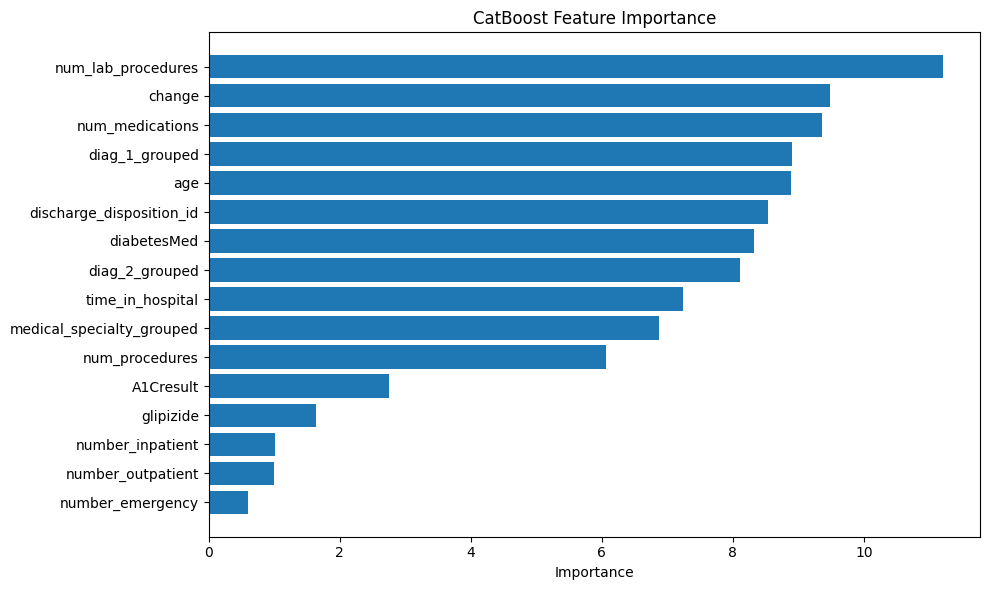

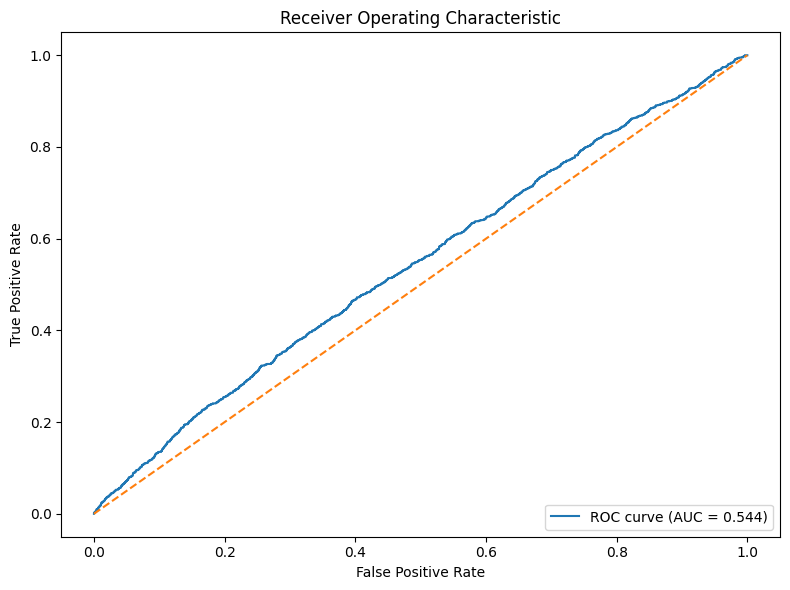

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# extract the trained CatBoostClassifier from your pipeline
clf = best_model.named_steps['clf']

# 1) Feature importance
# ---------------------
# get raw importances
importances = clf.get_feature_importance(type='FeatureImportance')
feature_names = X_train.columns

# sort by importance
idx = importances.argsort()
sorted_feats = feature_names[idx]
sorted_imps  = importances[idx]

# plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feats, sorted_imps)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


# 2) ROC AUC curve
# ----------------
# get predicted probabilities for the positive class
y_score = best_model.predict_proba(X_test)[:, 1]

# compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


the results areno't promising as you can see the AUC is 0.54
but we can idenitfy a few features which will be key in the steps we're doing to build a different model

In [ ]:
df_cat['readmitted'].value_counts()/len(df_cat)

,count
readmitted,
0,0.912008
1,0.087992


In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# ------------------------------
# 1. Assume df_cat is your original DataFrame.
# Here we select only the features of interest plus the target.
selected_features = [
    'A1Cresult', 'glipizide', 'time_in_hospital', 'diag_1_grouped',
    'medical_specialty_grouped', 'num_procedures', 'number_inpatient',
    'diabetesMed', 'age', 'change', 'num_lab_procedures', 'diag_2_grouped',
    'number_outpatient', 'number_emergency', 'num_medications',
    'discharge_disposition_id'
]
target = 'readmitted'  # Change if your target column is named differently

# Subset the DataFrame to only the selected features and the target.
df_selected = df_cat[selected_features + [target]].copy()

# ------------------------------
# 2. Identify categorical features among the selected ones.
# Based on your domain knowledge, we assume these columns are categorical.
# (Adjust the list below if necessary.)
categorical_features_selected = [
    'A1Cresult', 'diag_1_grouped', 'medical_specialty_grouped', 'diag_2_grouped', 'diabetesMed'
]

# Ensure that all categorical features are treated as strings.
for col in categorical_features_selected:
    df_selected[col] = df_selected[col].astype(str)

# ------------------------------
# 3. Split the data into features (X) and target (y), then into train and test sets.
X = df_selected[selected_features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Pool objects for CatBoost that specify which features are categorical.
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_selected)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_selected)

# ------------------------------
# Approach 1: Train CatBoost without SMOTE.
model_without_smote = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    task_type='GPU',    # Remove or change if not using GPU
    verbose=10
)
model_without_smote.fit(train_pool, eval_set=test_pool)

pred_without_smote = model_without_smote.predict(test_pool)
accuracy_without_smote = accuracy_score(y_test, pred_without_smote)
print("Test Accuracy without SMOTE:", accuracy_without_smote)
print("Classification Report without SMOTE:")
print(classification_report(y_test, pred_without_smote))

# ------------------------------
# Approach 2: Apply SMOTE on the training set then train CatBoost.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# After SMOTE, ensure that the categorical columns remain strings.
for col in categorical_features_selected:
    X_train_res[col] = X_train_res[col].astype(str)

# Create a new Pool for the resampled training data.
train_pool_smote = Pool(data=X_train_res, label=y_train_res, cat_features=categorical_features_selected)

model_with_smote = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    task_type='GPU',    # Remove or change if not using GPU
    verbose=10
)
model_with_smote.fit(train_pool_smote, eval_set=test_pool)

pred_with_smote = model_with_smote.predict(test_pool)
accuracy_with_smote = accuracy_score(y_test, pred_with_smote)
print("Test Accuracy with SMOTE:", accuracy_with_smote)
print("Classification Report with SMOTE:")
print(classification_report(y_test, pred_with_smote))


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="No": Cannot convert 'No' to float